In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
ftr_path = '../data/2_features/'

In [50]:
tot_ftr_df = pd.DataFrame()
machine_ids = [1,2,5,6,7,8,9,10]
machine_ids = [2,8,9,10]
for machine_id in [1]:#machine_ids:#range(1, 11):#
    ftr_df = pd.read_csv(ftr_path + str(machine_id) + '.csv')
    ftr_df['machine_id'] = machine_id
    ftr_df['operation_times'] = ftr_df.index
    tot_ftr_df = tot_ftr_df.append(ftr_df, ignore_index = True)

In [210]:
en_col = ['energy','duration']
cn_col = ['能量','时长']

### 燃弧相角区间范围 30

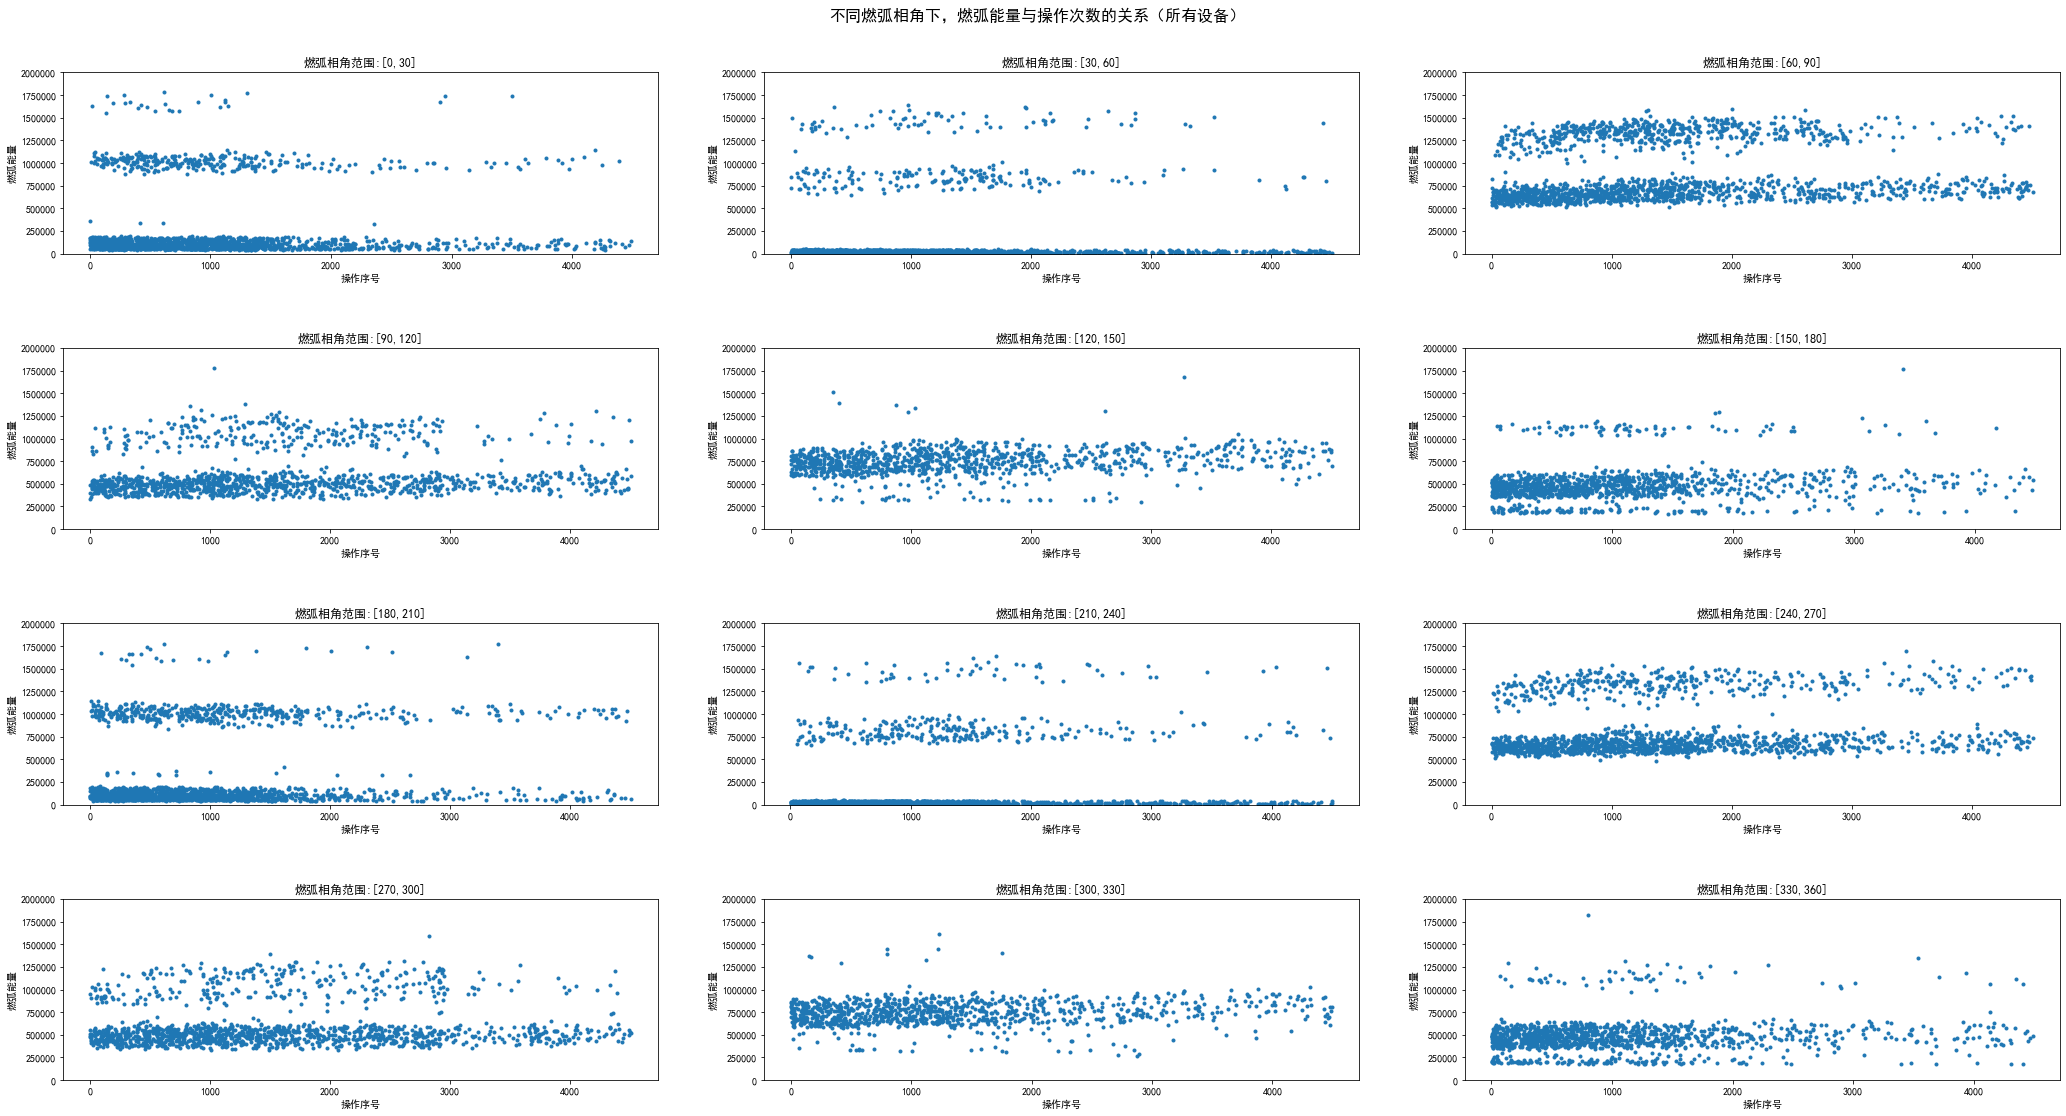

In [212]:
# 燃弧相角为30，所有设备的分析
res_file_path = '../res/phase_angle/'
angle_gap = 30

idx_col = 0
res_angle_path = res_file_path + '燃弧相角间隔_' + str(angle_gap) + '/燃弧' + cn_col[idx_col] +'/'
if not os.path.exists(res_angle_path):
    os.makedirs(res_angle_path)


tot_ftr_df = pd.DataFrame()
for machine_id in range(1, 11):#
    ftr_df = pd.read_csv(ftr_path + str(machine_id) + '.csv')
    ftr_df['machine_id'] = machine_id
    ftr_df['operation_times'] = ftr_df.index
    tot_ftr_df = tot_ftr_df.append(ftr_df, ignore_index = True)
    
fig = plt.figure(figsize = (30,16))
title = '不同燃弧相角下，燃弧' + cn_col[idx_col] +'与操作次数的关系（所有设备）'
fig.suptitle(title,fontsize=16,y=1)
#plt.subplots_adjust(hspace=0.5,wspace=0.2)
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

y_max = max(tot_ftr_df['A_arcing_' + en_col[idx_col]])
for i in range(int(360 / angle_gap)):
    plt.subplot(int(360 / angle_gap / 3) ,3,i + 1)
    plt.tight_layout(pad=5) 
    tmp_df = tot_ftr_df[(tot_ftr_df['A_phase_angle'] >= i * angle_gap) & (tot_ftr_df['A_phase_angle'] <= (i + 1) * angle_gap)]
    plt.plot(tmp_df['operation_times'], tmp_df['A_arcing_' + en_col[idx_col]],'.')
    plt.title('燃弧相角范围:[' + str(i * angle_gap) +','+ str((i + 1) * angle_gap)+']')
    plt.xlabel('操作序号')
    plt.ylabel('燃弧'+ cn_col[idx_col])
    plt.ylim([0,y_max + 2])
    #plt.ylim([0,2000000])

fig.savefig(res_angle_path + title +'.png', dpi=100,bbox_inches ='tight')
#break

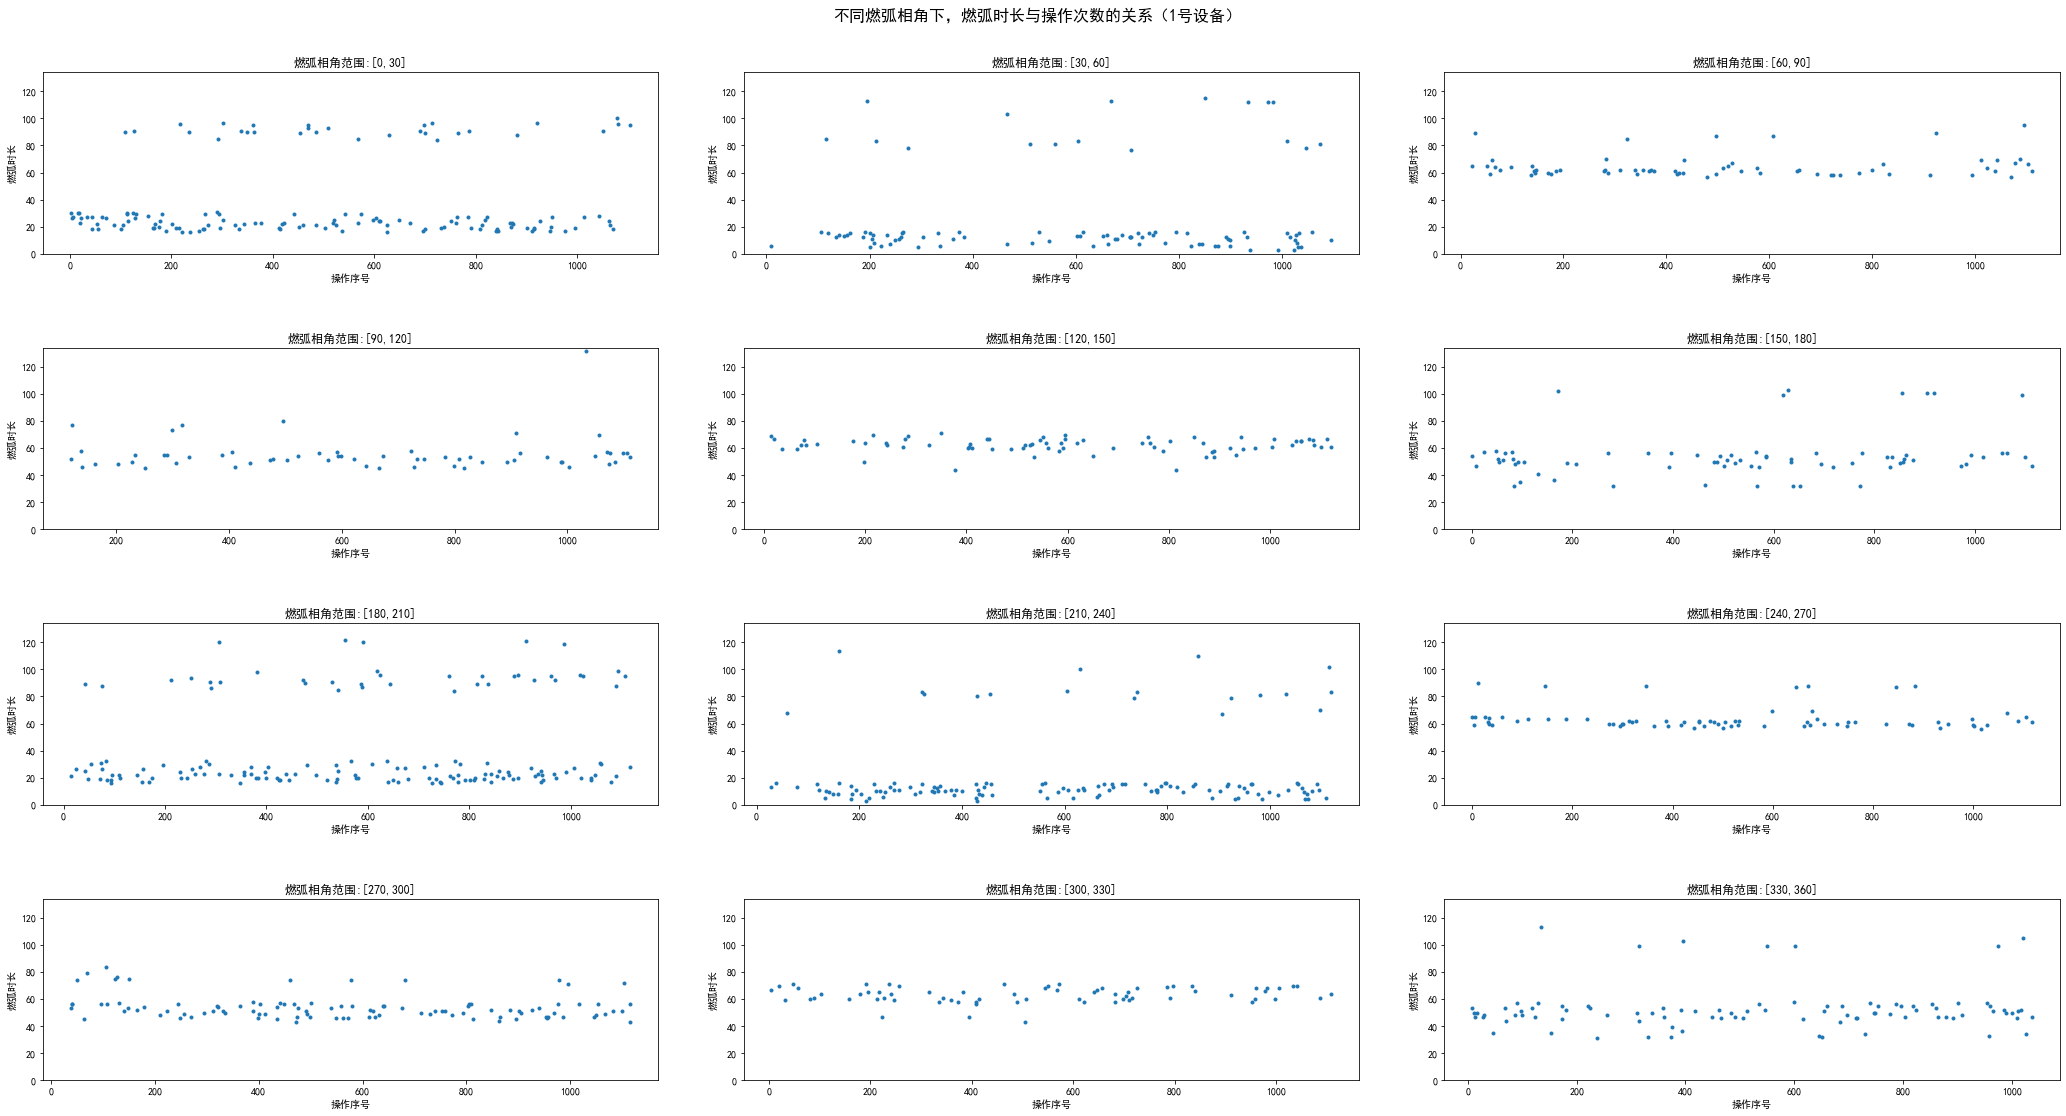

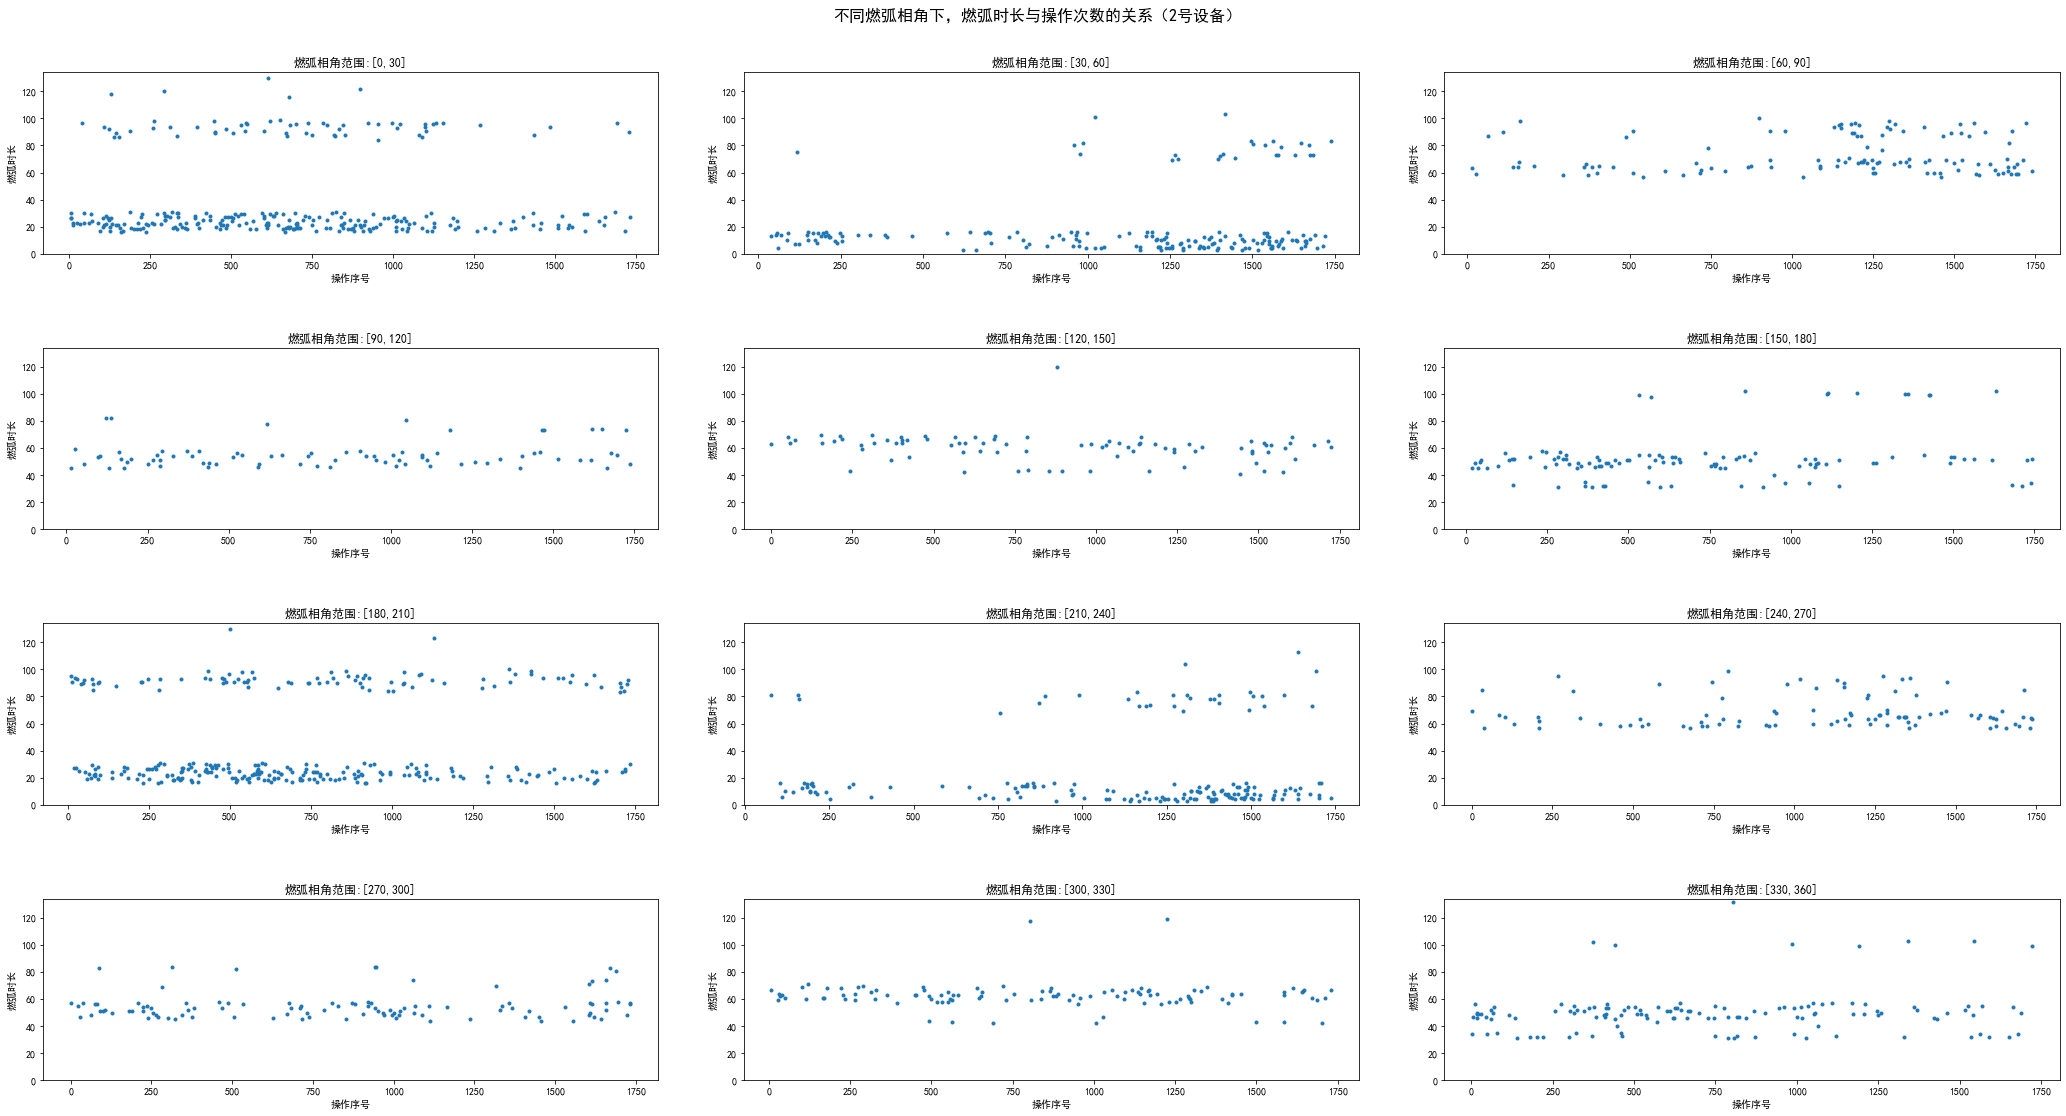

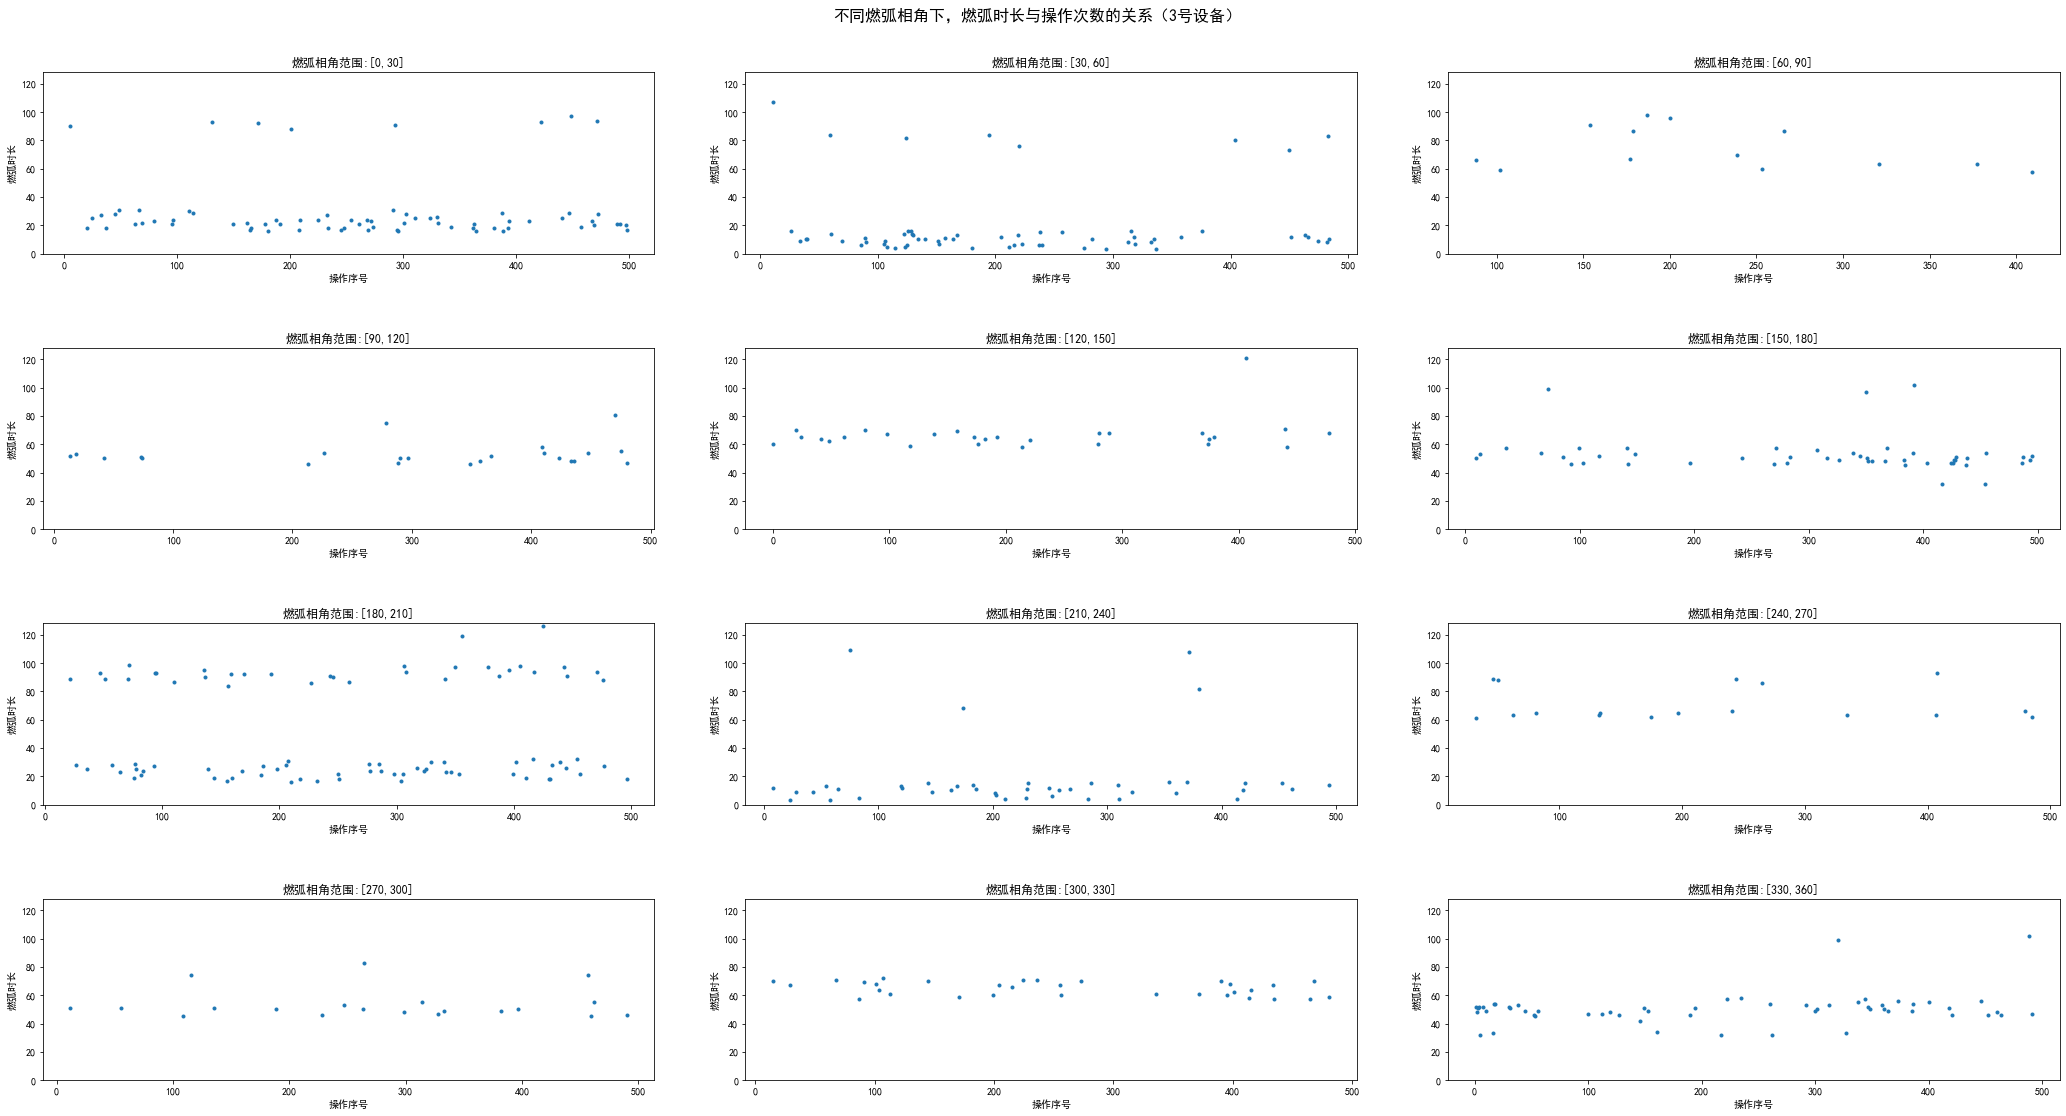

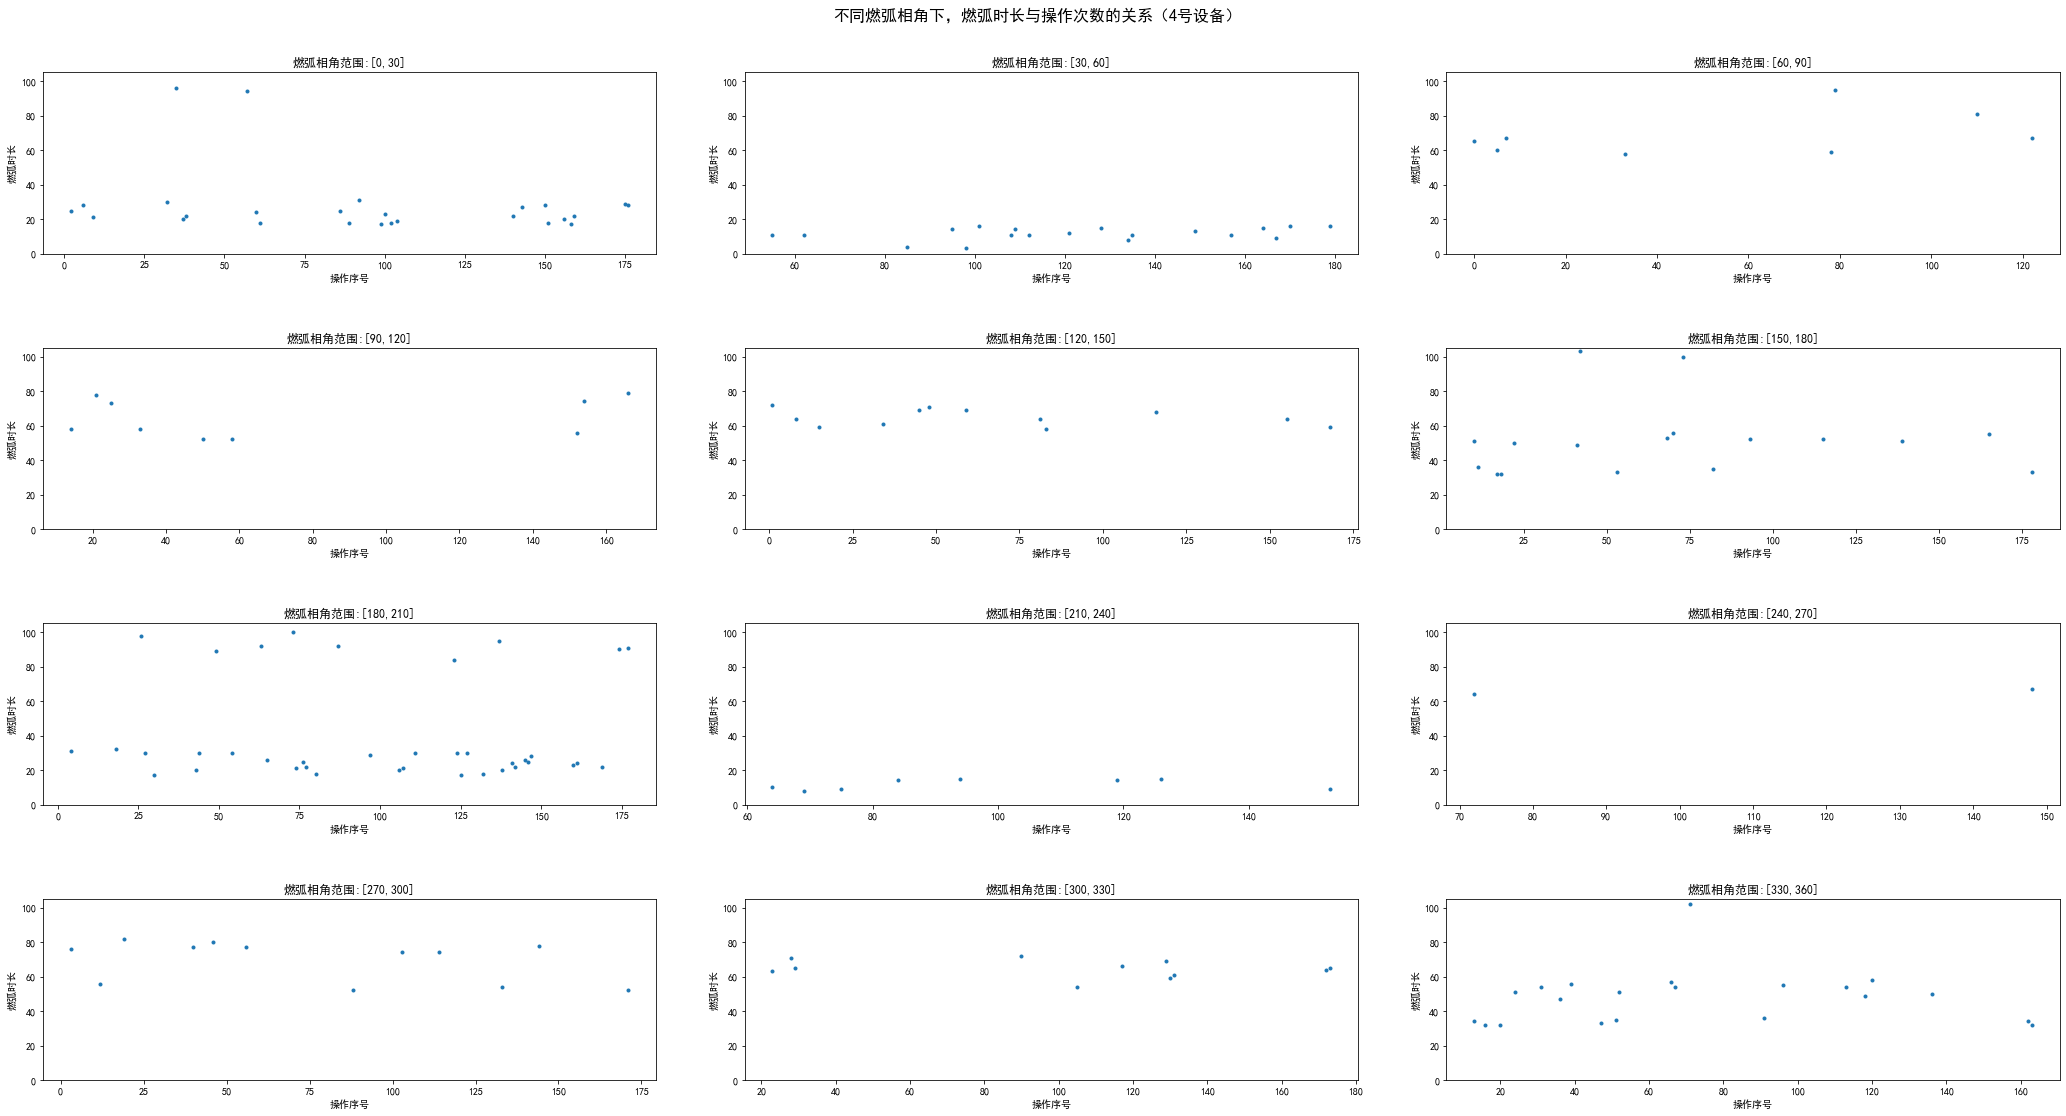

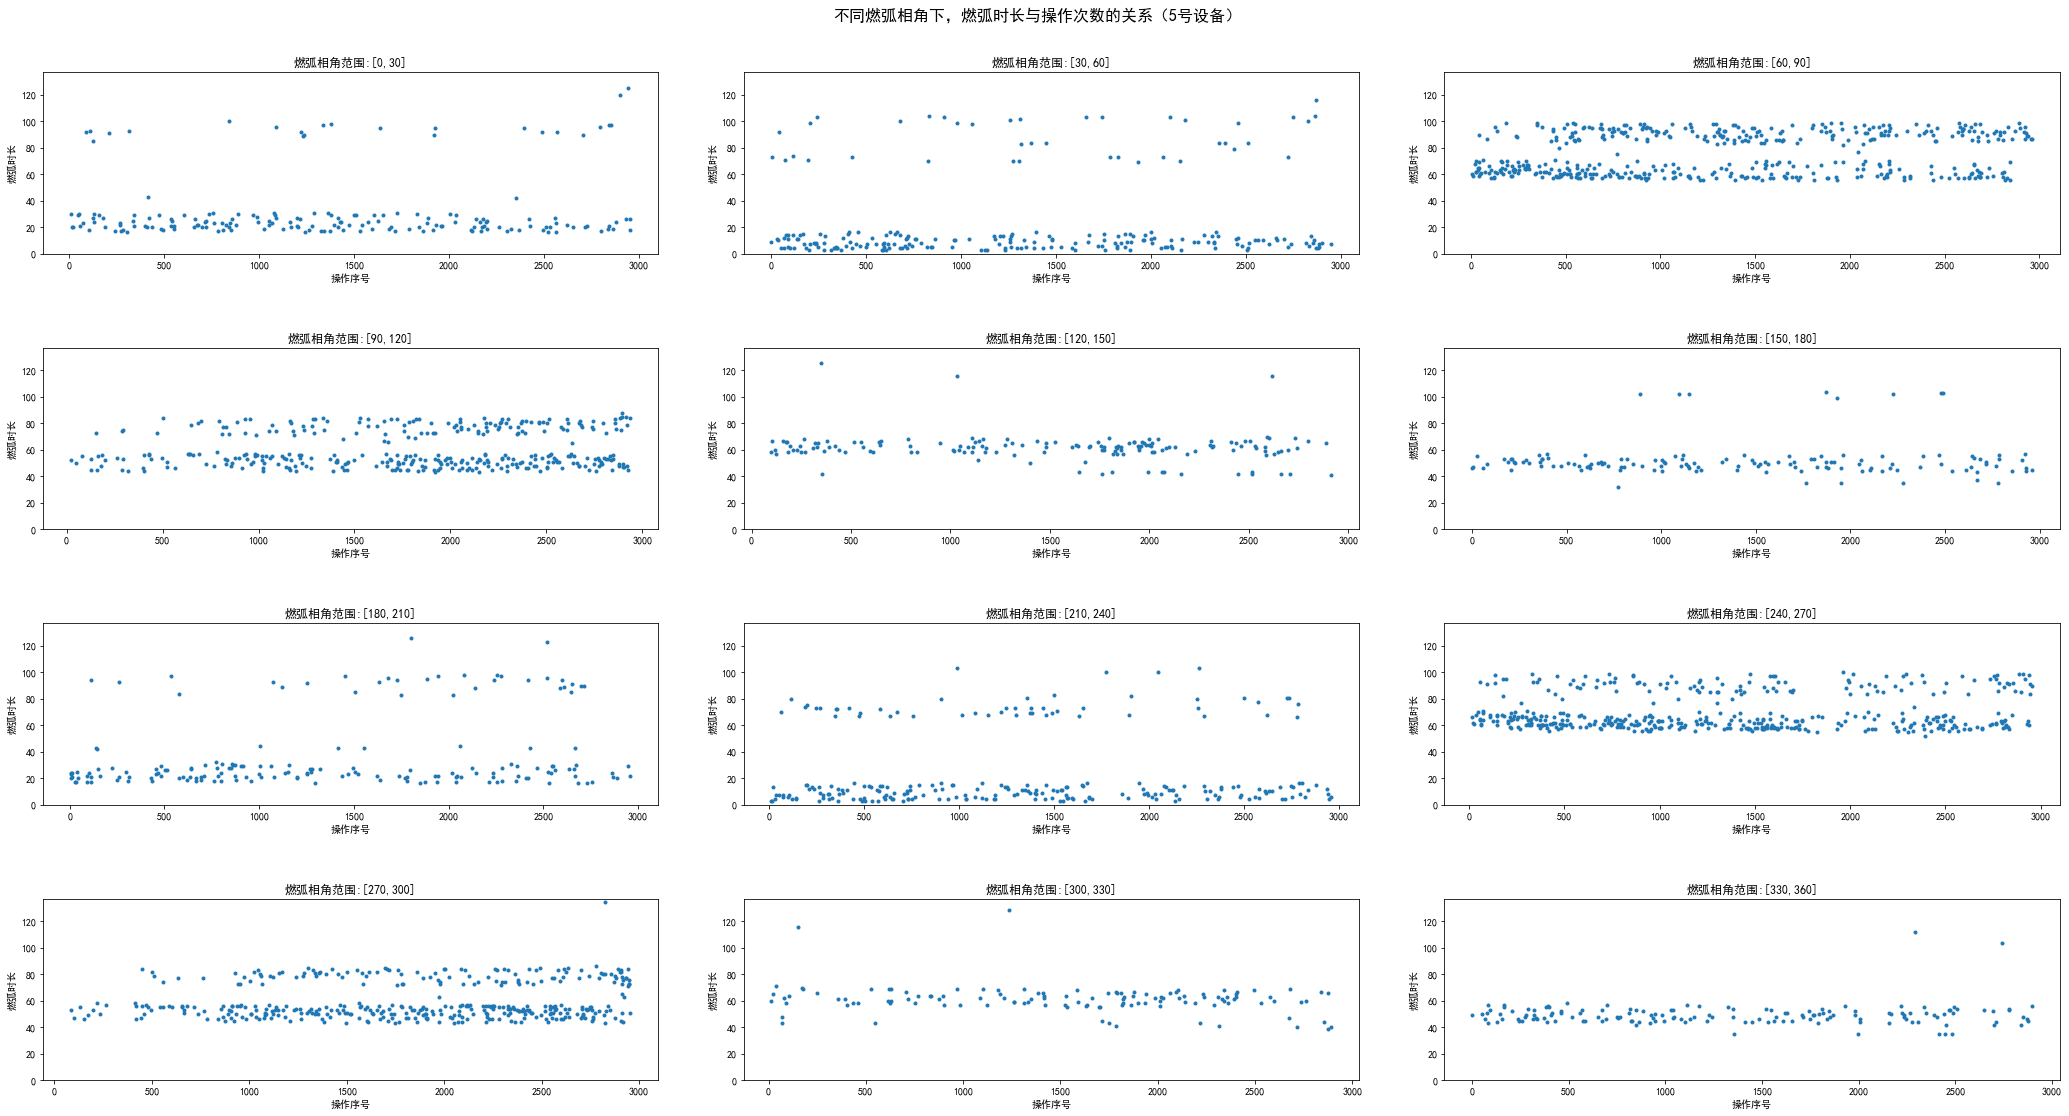

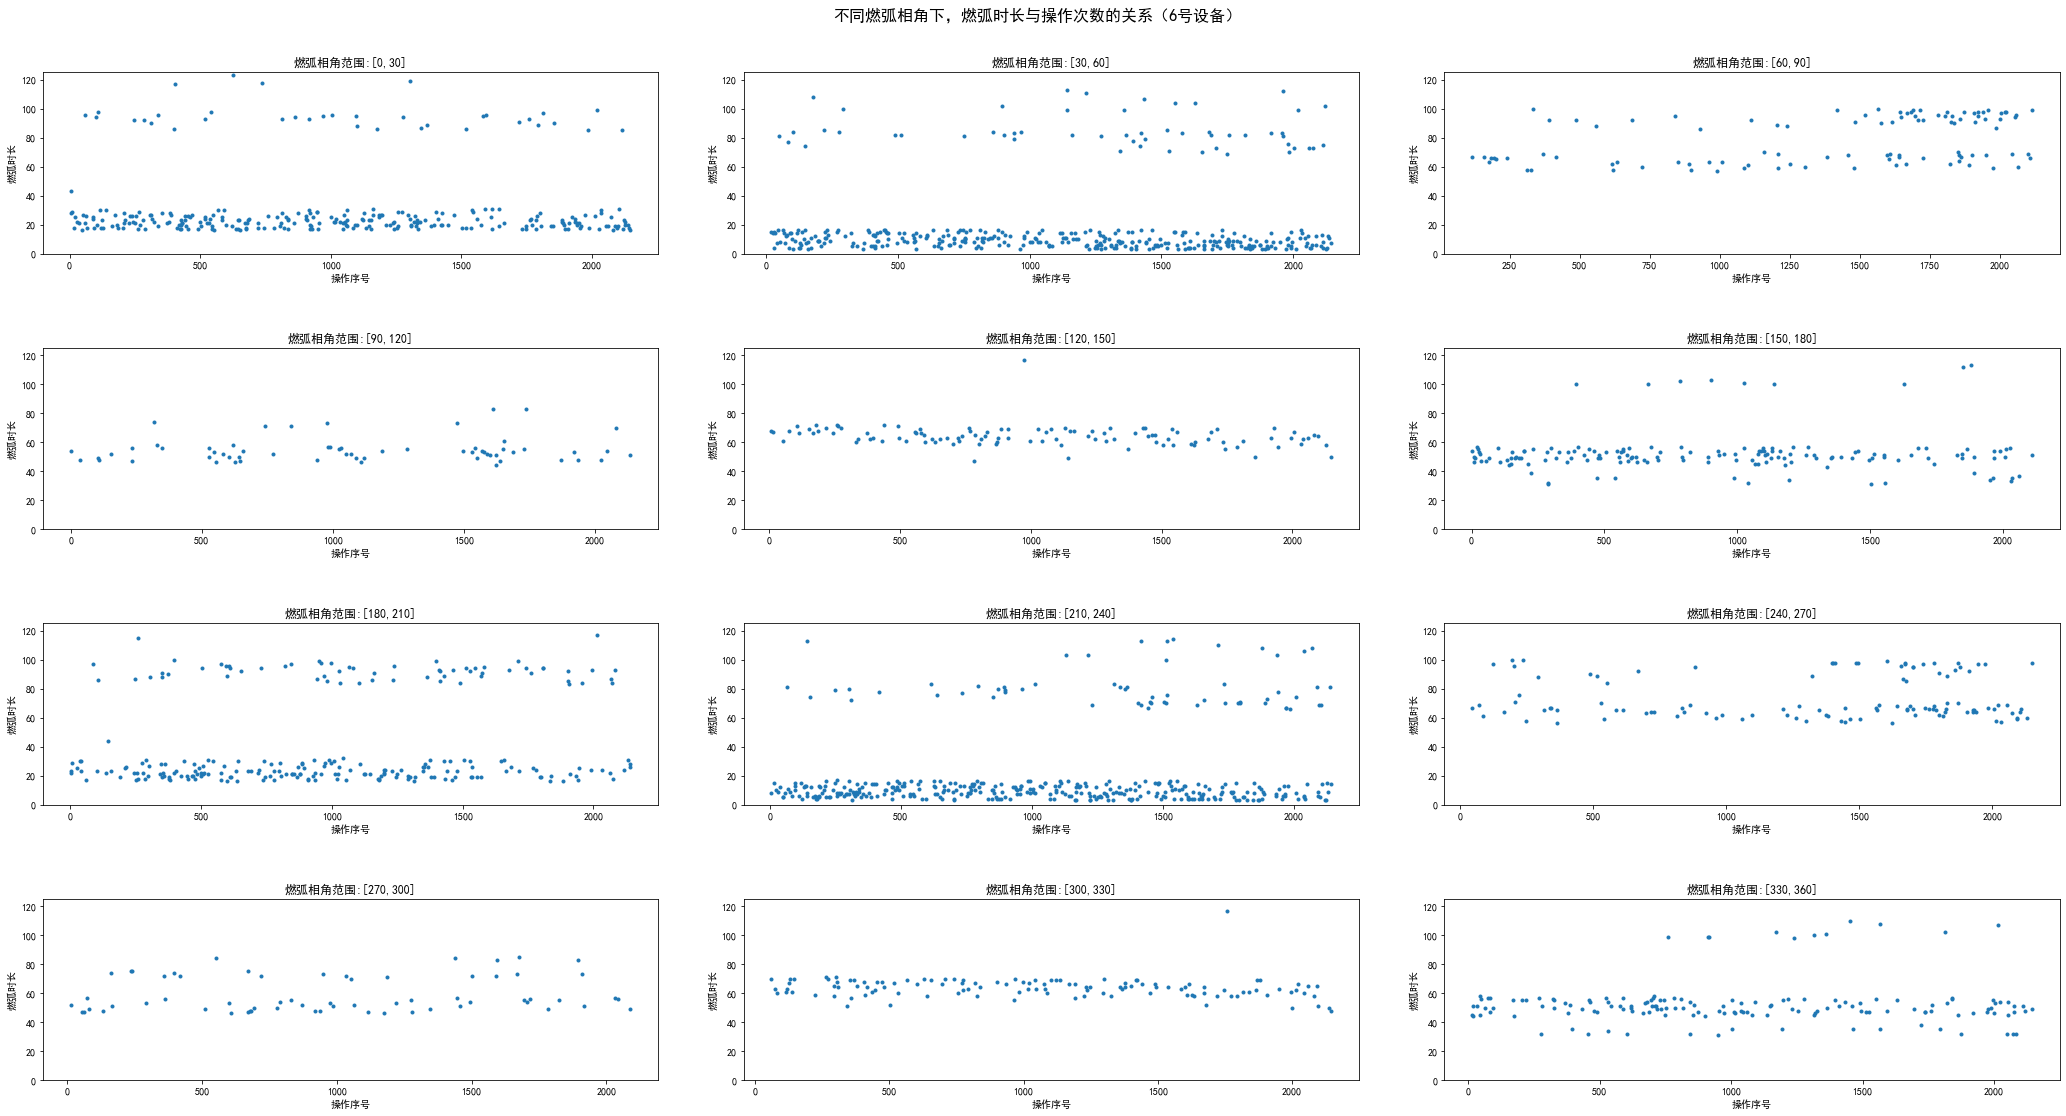

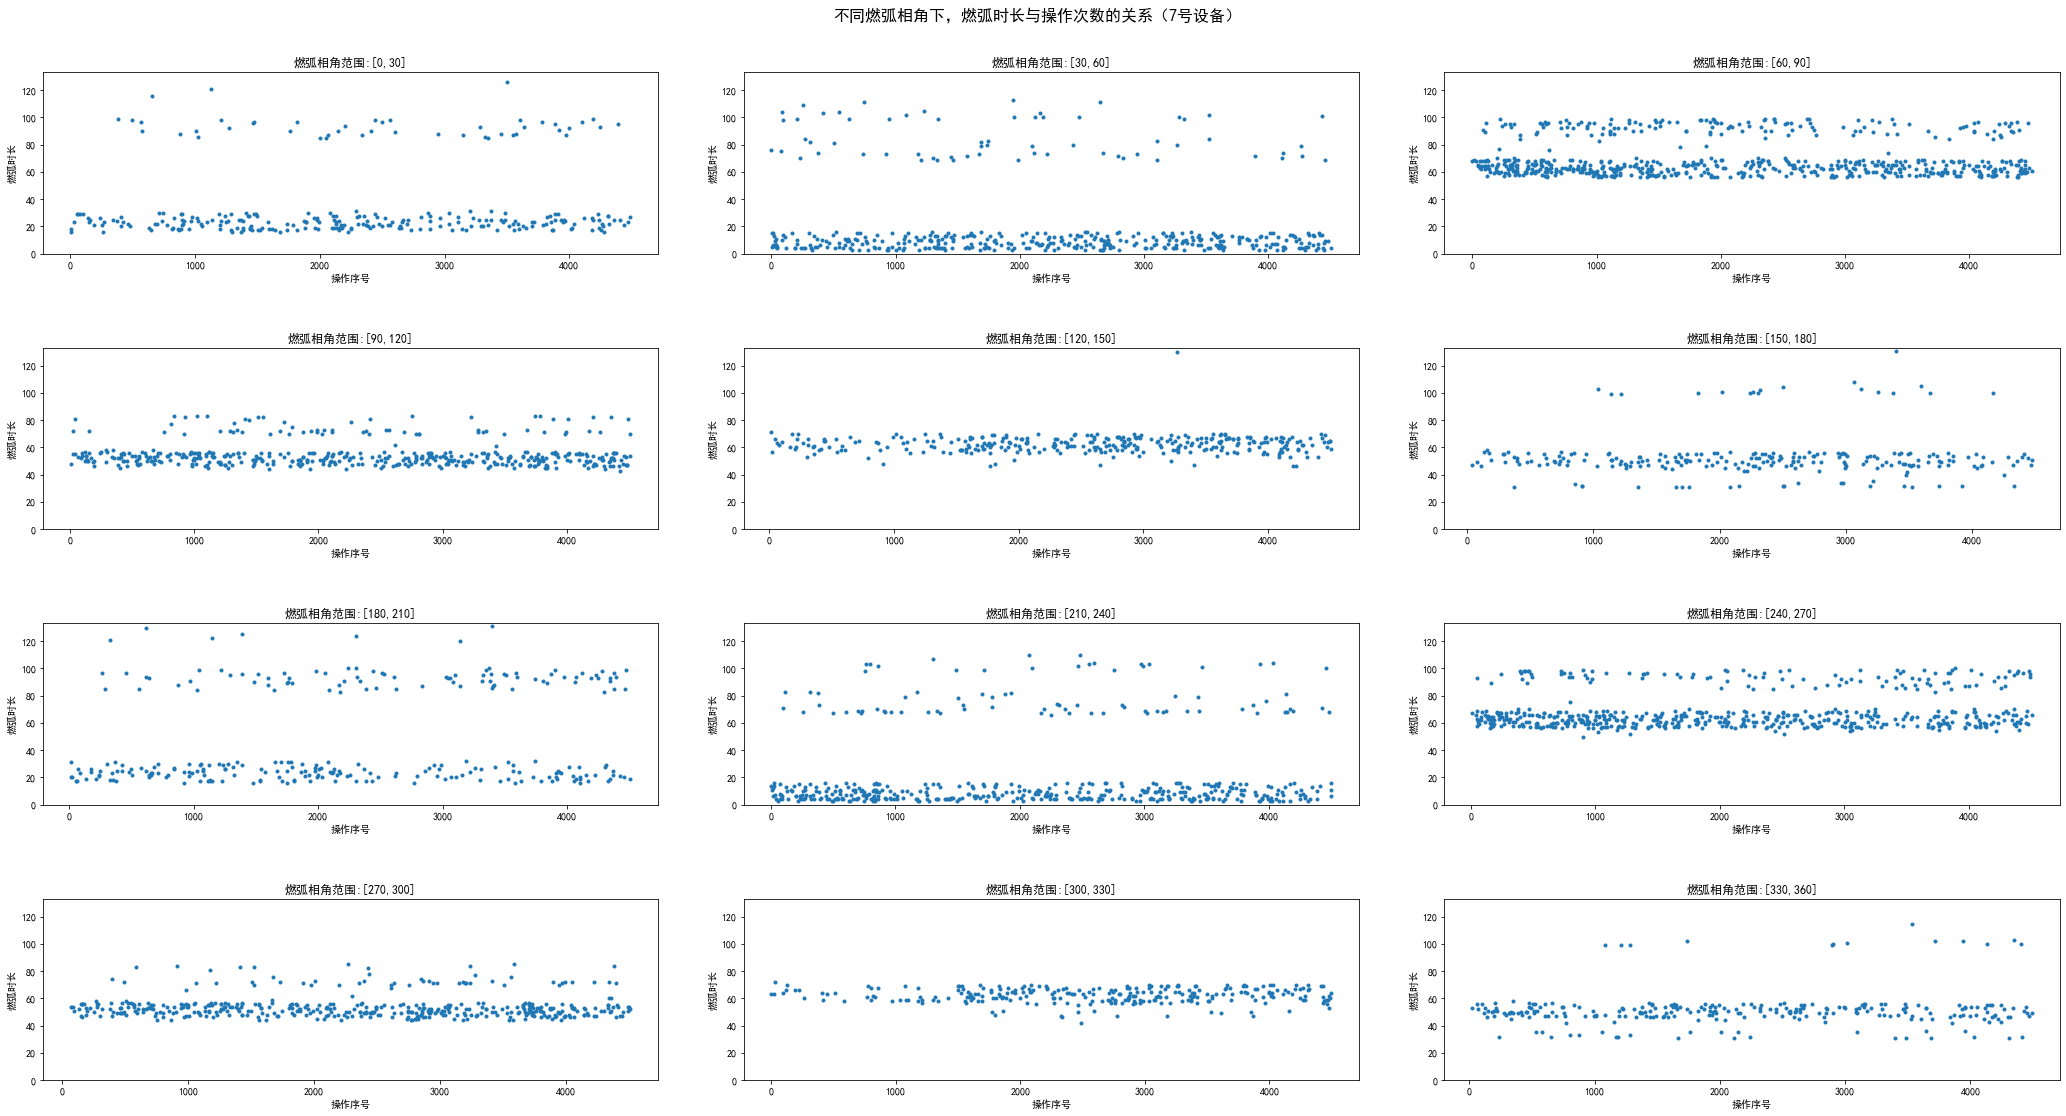

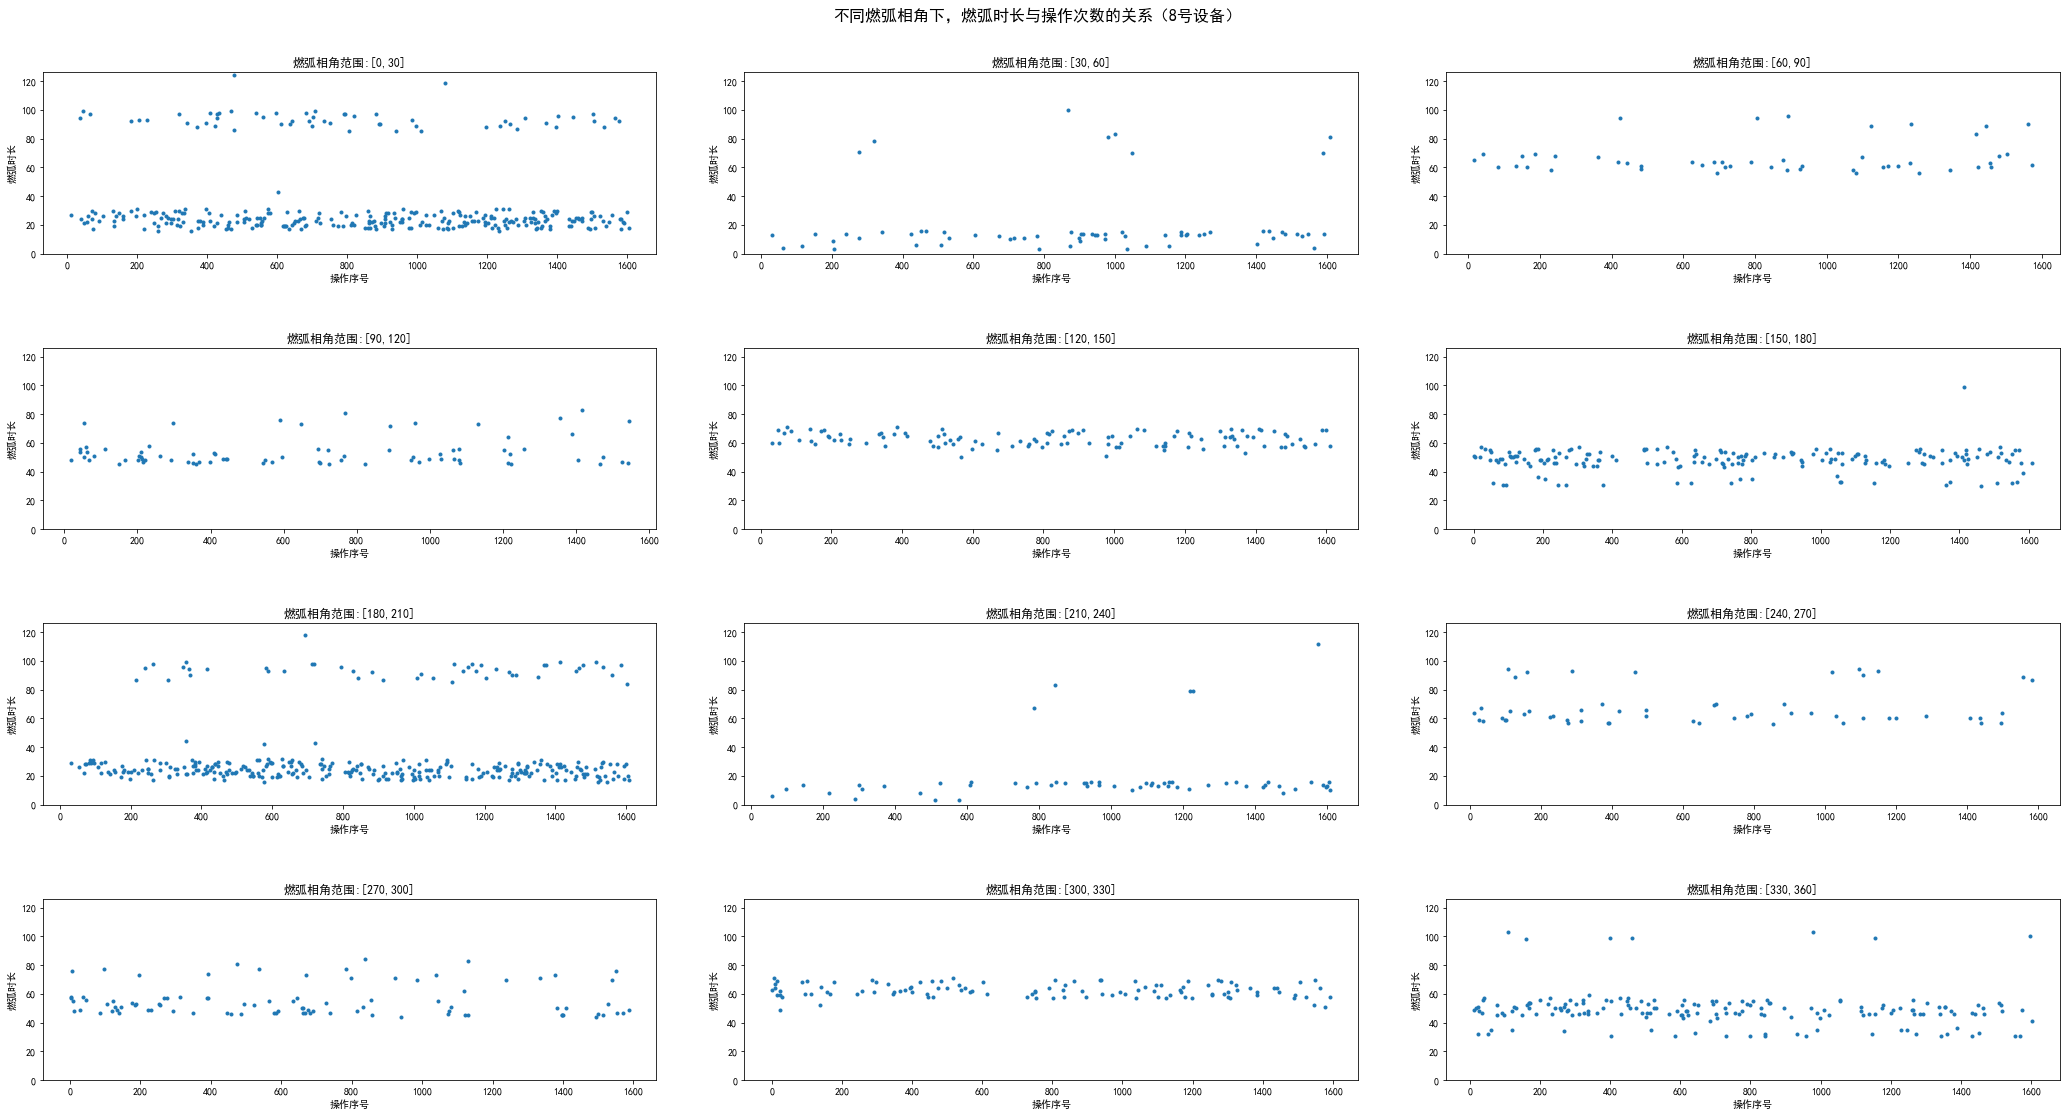

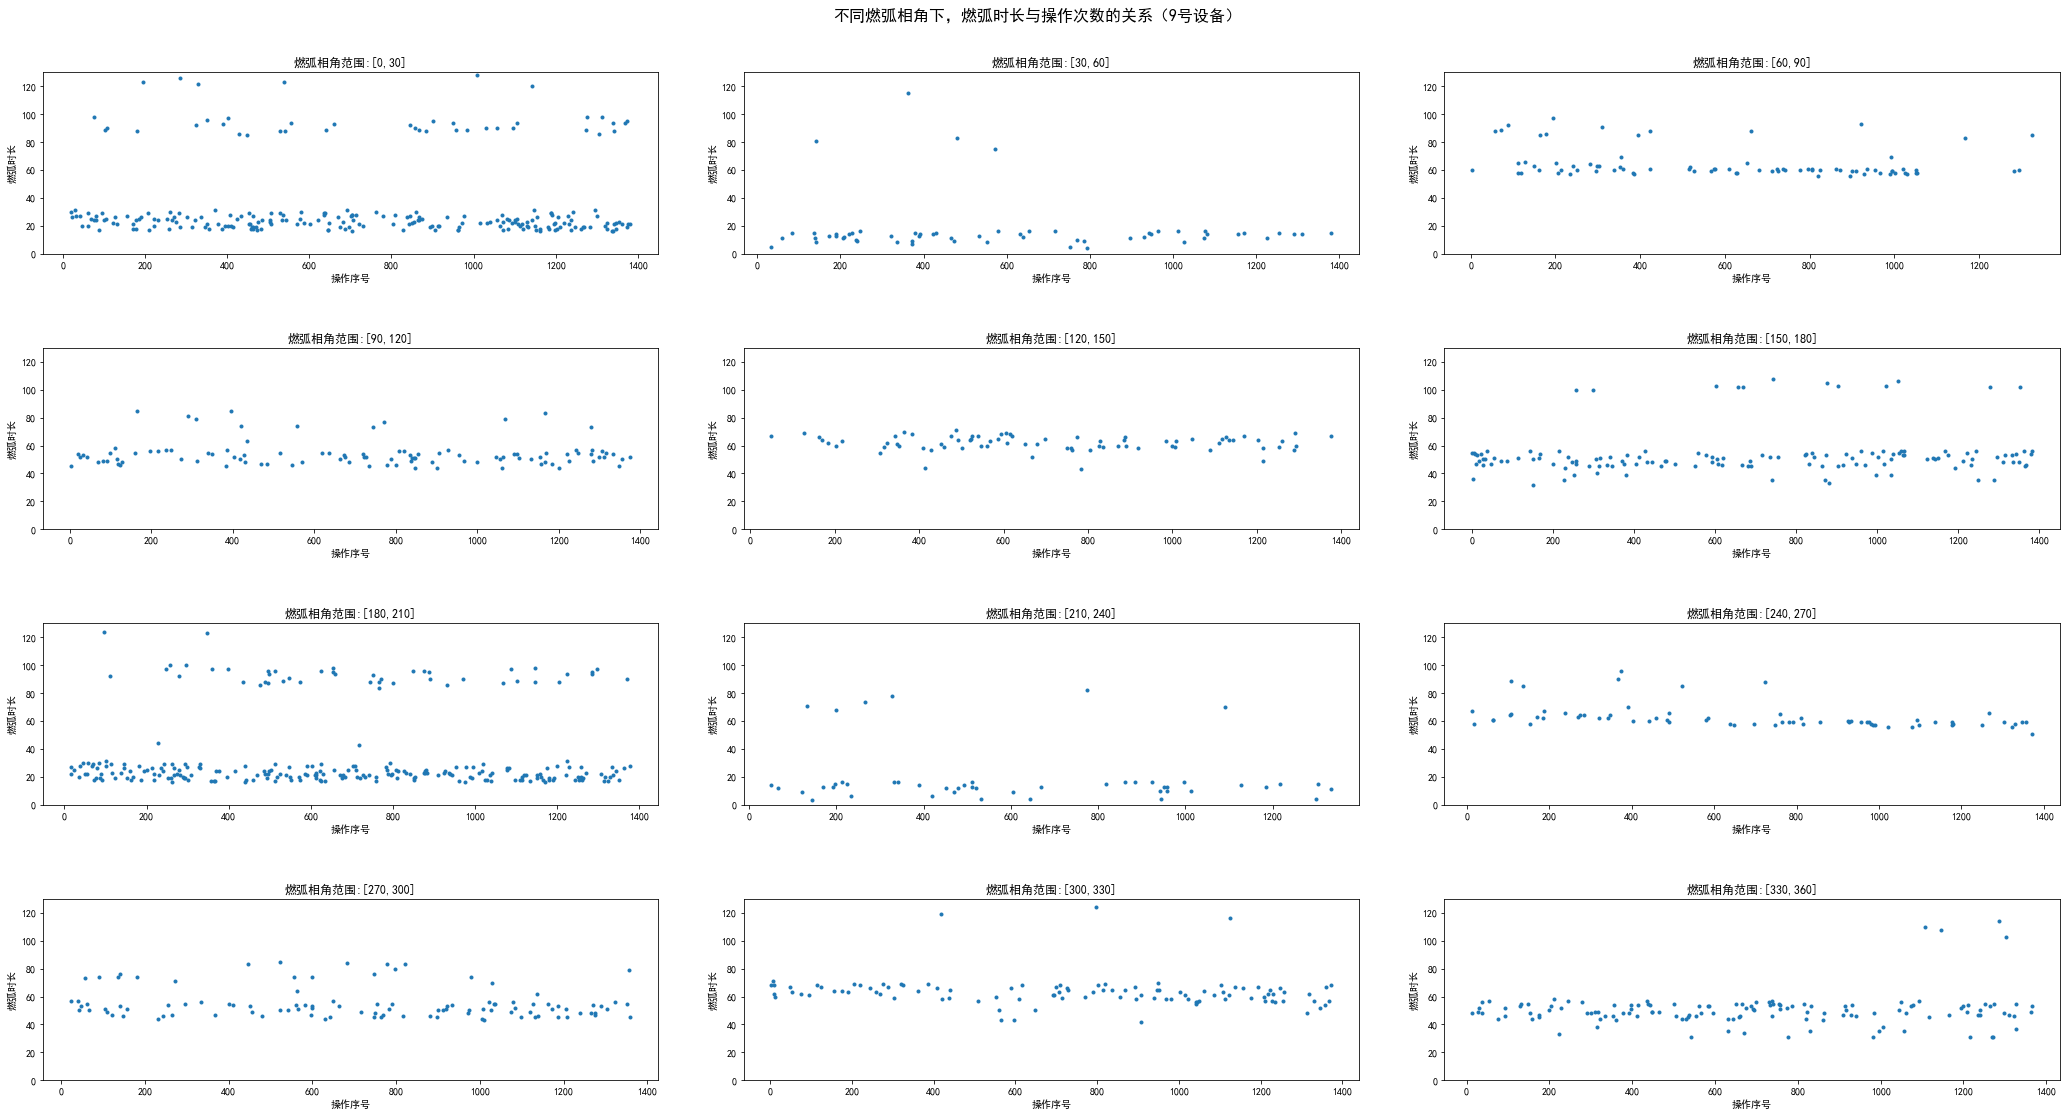

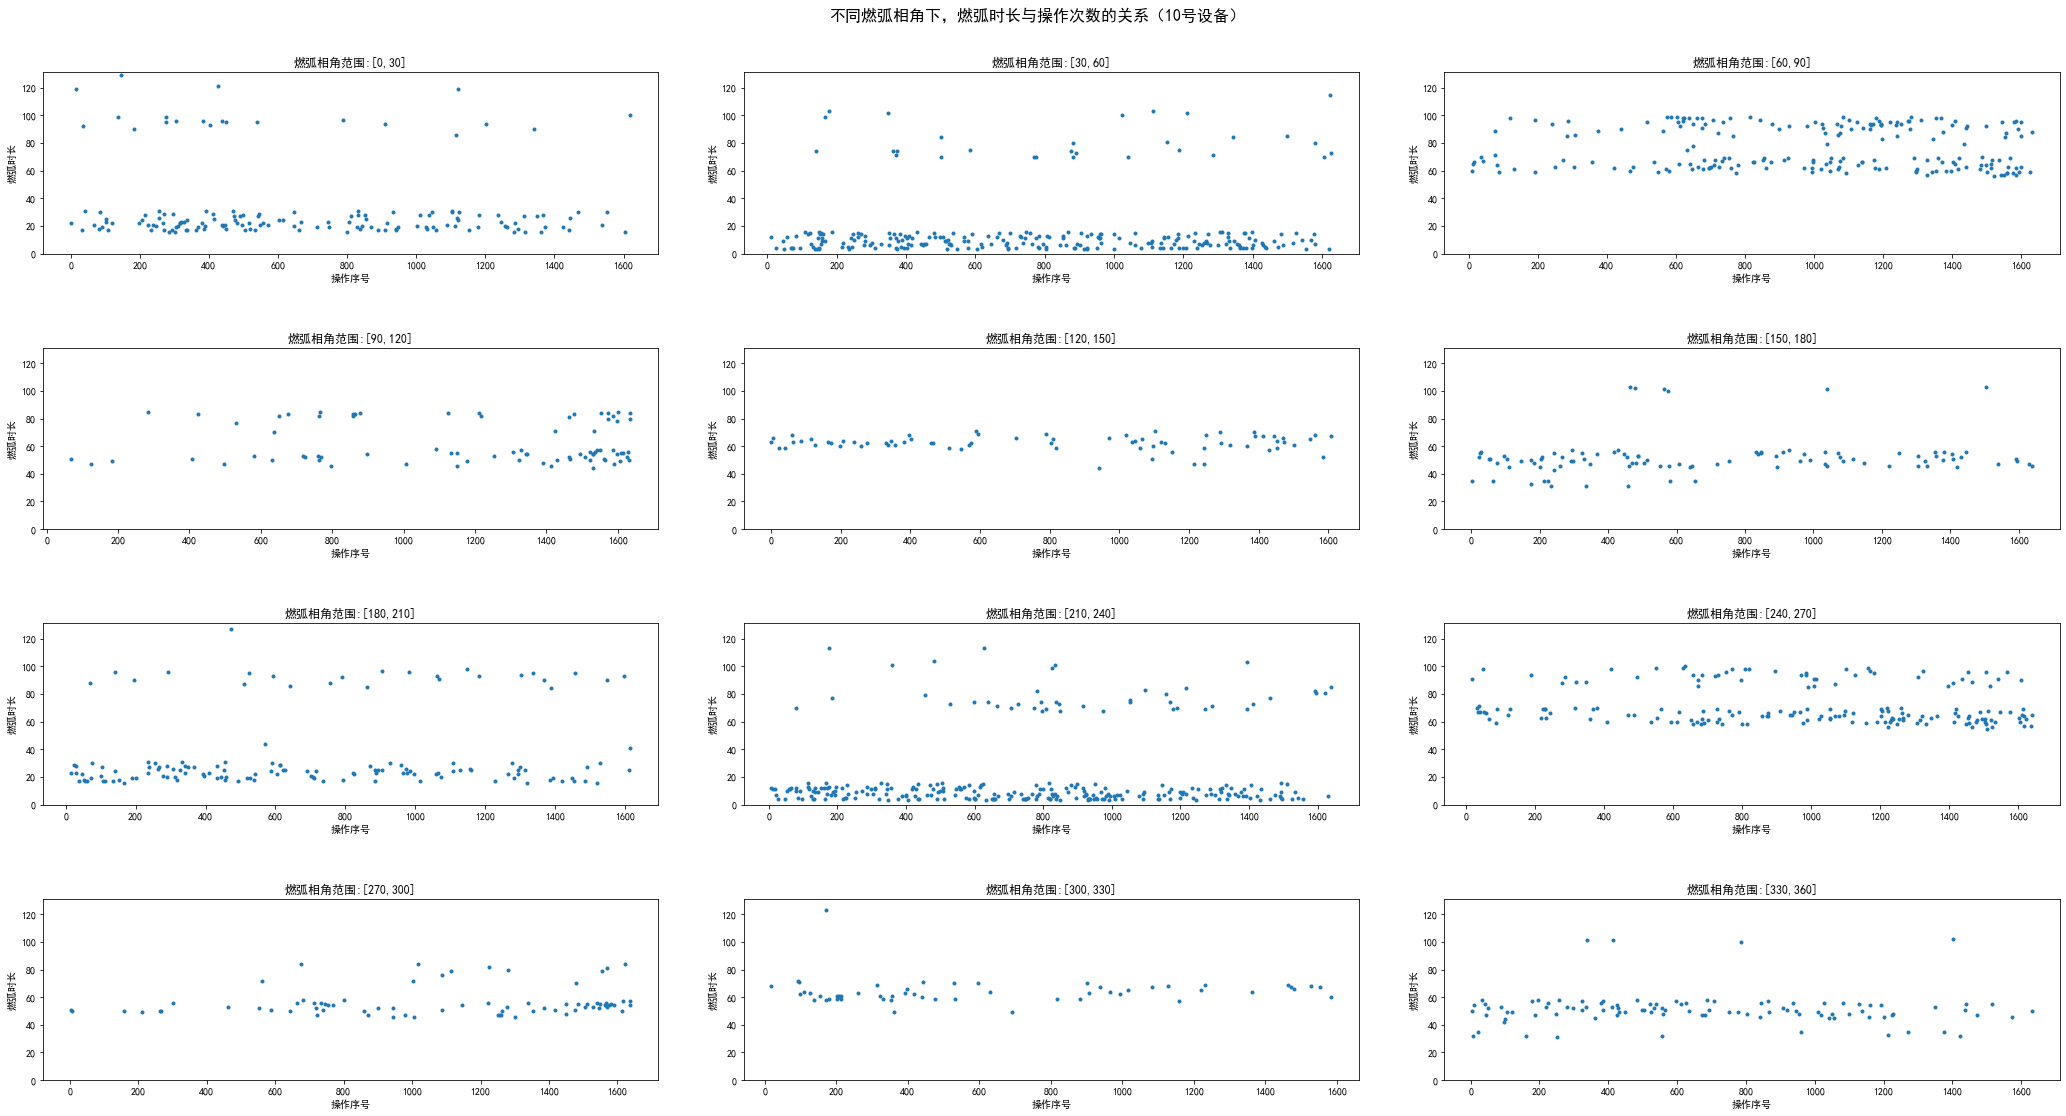

In [215]:
res_file_path = '../res/phase_angle/'

idx_col = 1
res_angle_path = res_file_path + '燃弧相角间隔_' + str(angle_gap) + '/燃弧' + cn_col[idx_col] +'/'
if not os.path.exists(res_angle_path):
    os.makedirs(res_angle_path)

for machine_id in range(1, 11):#
    tot_ftr_df = pd.DataFrame()
    ftr_df = pd.read_csv(ftr_path + str(machine_id) + '.csv')
    ftr_df['machine_id'] = machine_id
    ftr_df['operation_times'] = ftr_df.index
    tot_ftr_df = tot_ftr_df.append(ftr_df, ignore_index = True)
    
    fig = plt.figure(figsize = (30,16))
    title = '不同燃弧相角下，燃弧' + cn_col[idx_col] +'与操作次数的关系（'+ str(machine_id) +'号设备）'
    fig.suptitle(title,fontsize=16,y=1)
    #plt.subplots_adjust(hspace=0.5,wspace=0.2)
    #解决中文显示问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    y_max = max(tot_ftr_df['A_arcing_' + en_col[idx_col]])
    for i in range(int(360 / angle_gap)):
        plt.subplot(int(360 / angle_gap / 3) ,3,i + 1)
        plt.tight_layout(pad=5) 
        tmp_df = tot_ftr_df[(tot_ftr_df['A_phase_angle'] >= i * angle_gap) & (tot_ftr_df['A_phase_angle'] <= (i + 1) * angle_gap)]
        plt.plot(tmp_df['operation_times'], tmp_df['A_arcing_' + en_col[idx_col]],'.')
        plt.title('燃弧相角范围:[' + str(i * angle_gap) +','+ str((i + 1) * angle_gap)+']')
        plt.xlabel('操作序号')
        plt.ylabel('燃弧'+ cn_col[idx_col])
        plt.ylim([0,y_max + 2])
        # plt.ylim([0,2000000])
    fig.savefig(res_angle_path + title+ '.png', dpi=100,bbox_inches ='tight')
    #break

In [108]:
tot_ftr_df.describe()

A_arcing_start  A_arcing_end  A_arcing_duration  A_arcing_energy  \
count    46005.000000  46005.000000       46005.000000     4.600500e+04   
mean      6277.828019   6324.459559          46.631540     4.685173e+05   
std         75.256744     76.311953          26.585484     3.794504e+05   
min       6040.000000   6100.000000           3.000000     2.612513e+03   
25%       6224.000000   6269.000000          21.000000     7.786087e+04   
50%       6277.000000   6322.000000          51.000000     4.872046e+05   
75%       6332.000000   6379.000000          62.000000     6.936996e+05   
max       6499.000000   6572.000000         135.000000     8.749750e+06   

       A_arcing_electricity  A_arcing_power  A_phase_angle  \
count          4.600500e+04    46005.000000   46005.000000   
mean           1.566981e+06     7754.852099     174.669292   
std            1.136777e+06     4039.820175     105.196408   
min            8.562851e+02      653.128276       1.800000   
25%            3.003134e+05     3562.630567      81.000000   
50%            1.847653e+06     9260.931357     189.000000   
75%            2.148915e+06    10783.277948     262.800000   
max            4.458253e+06    93082.449563     360.000000   

       A_phase_angle_start  A_phase_angle_end     A_touch_I  ...  \
count         46005.000000       46005.000000  46005.000000  ...   
mean           6277.828019        6380.789523    318.899937  ...   
std              75.256744          99.994469      2.628118  ...   
min            6040.000000        6081.000000    304.811406  ...   
25%            6224.000000        6311.000000    317.013833  ...   
50%            6277.000000        6379.000000    319.166604  ...   
75%            6332.000000        6452.000000    320.951641  ...   
max            6499.000000        6683.000000    326.270317  ...   

       C_arcing_electricity  C_arcing_power  C_phase_angle  \
count          4.600500e+04    46005.000000   46005.000000   
mean           1.919047e+06     8336.376686     187.776642   
std            1.134124e+06     3735.302371     105.583075   
min            2.738240e+02      233.801471       1.800000   
25%            1.410065e+06     6892.956272     104.400000   
50%            2.023984e+06     9557.597772     172.800000   
75%            2.856112e+06    10873.486120     293.400000   
max            4.725872e+06    29397.880588     360.000000   

       C_phase_angle_start  C_phase_angle_end     C_touch_I     C_touch_U  \
count         46005.000000       46005.000000  46005.000000  46005.000000   
mean           6278.028714        6373.708358    321.847385      4.029638   
std              75.036755          87.409243      2.684587      0.429359   
min            6040.000000        6122.000000    306.605761      3.291406   
25%            6224.000000        6310.000000    319.961402      3.750585   
50%            6277.000000        6372.000000    322.049811      3.924915   
75%            6332.000000        6435.000000    323.952872      4.110058   
max            6499.000000        6662.000000    329.050702      5.551991   

          C_touch_R    machine_id  operation_times  
count  46005.000000  46005.000000     46005.000000  
mean       0.012519      2.969199       835.968569  
std        0.001321      2.920941       782.122717  
min        0.010159      1.000000         0.000000  
25%        0.011651      1.000000       327.000000  
50%        0.012190      1.000000       671.000000  
75%        0.012785      5.000000      1019.000000  
max        0.017427     10.000000      4510.000000  

[8 rows x 38 columns]

In [111]:
max(tot_ftr_df['A_arcing_duration'])

132

In [219]:
angle_gap = 20
#plt.figure(figsize = (20,200))
for i in range(int(360 / angle_gap)):
    #plt.subplot(180,2,i + 1)
    tmp_df = tot_ftr_df[(tot_ftr_df['A_phase_angle'] >= i * angle_gap) & (tot_ftr_df['A_phase_angle'] <= (i + 1) * angle_gap)]
    break
    #plt.plot(tmp_df['operation_times'], tmp_df['A_arcing_duration'],'.')
    #plt.title('phase angle:[' + str(i * angle_gap) +','+ str((i + 1) * angle_gap)+']')
    #plt.ylim([0,2000000])
tmp_df.head()

A_arcing_start  A_arcing_end  A_arcing_duration  A_arcing_energy  \
0              6266          6288                 22     9.431293e+04   
35             6269          6361                 92     1.078619e+06   
43             6328          6359                 31     1.819603e+05   
84             6411          6441                 30     1.792497e+05   
102            6191          6214                 23     9.355863e+04   

     A_arcing_electricity  A_arcing_power  A_phase_angle  A_phase_angle_start  \
0            3.577613e+05     4100.562258           18.0                 6266   
35           1.753588e+06    11598.054701           14.4                 6269   
43           8.961129e+05     5686.260784            1.8                 6328   
84           8.806655e+05     5782.248842            1.8                 6411   
102          3.755015e+05     3898.276105           18.0                 6191   

     A_phase_angle_end   A_touch_I  ...  C_arcing_electricity  C_arcing_power  \
0                 6456  322.332577  ...          3.262358e+06    11894.657854   
35                6461  320.892209  ...          2.721863e+06    10048.762371   
43                6527  320.608365  ...          3.691688e+06    12938.418920   
84                6610  320.859668  ...          3.608383e+06    12675.913101   
102               6381  320.816900  ...          3.182064e+06    11820.420943   

     C_phase_angle  C_phase_angle_start  C_phase_angle_end   C_touch_I  \
0            138.6                 6266               6389  325.422446   
35           136.8                 6271               6395  323.816515   
43           120.6                 6328               6461  323.812636   
84           122.4                 6412               6544  323.722939   
102          138.6                 6192               6315  323.594252   

     C_touch_U  C_touch_R  machine_id  operation_times  
0     3.415132   0.010494          10                0  
35    3.797944   0.011728          10               35  
43    3.756195   0.011600          10               43  
84    4.084256   0.012616          10               84  
102   3.913542   0.012094          10              102  

[5 rows x 38 columns]

In [224]:
1 / 200 * 360

1.8

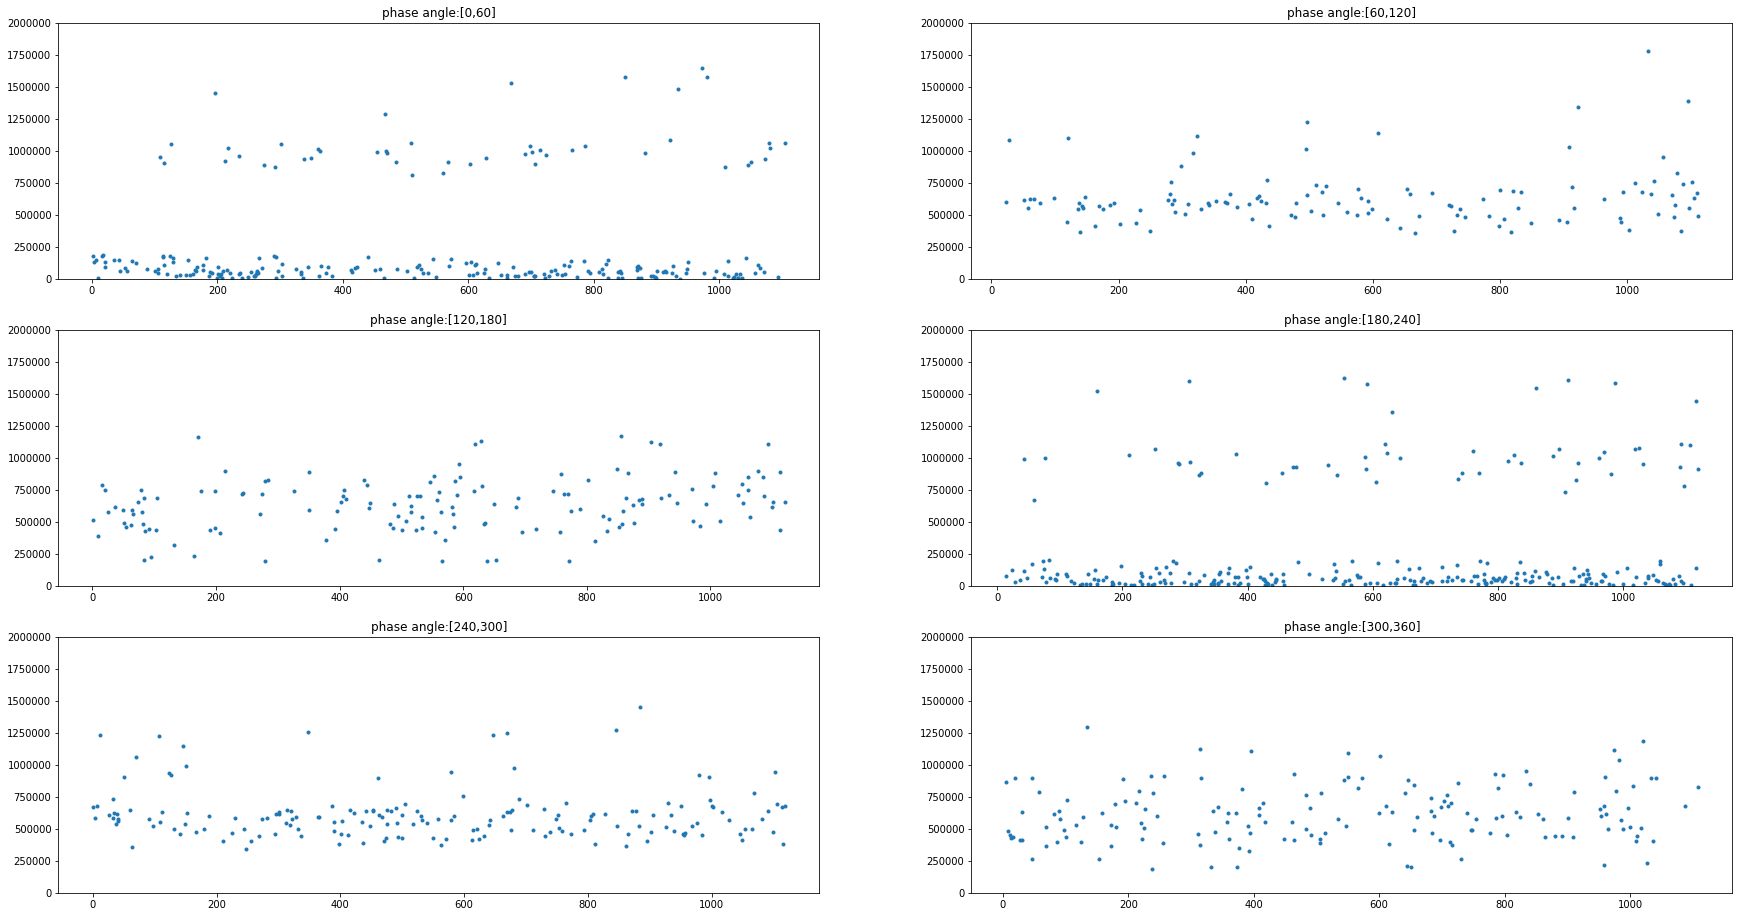

In [16]:
angle_gap = 60
plt.figure(figsize = (30,16))
for i in range(int(360 / angle_gap)):
    plt.subplot(3,2,i + 1)
    tmp_df = tot_ftr_df[(tot_ftr_df['A_phase_angle'] >= i * angle_gap) & (tot_ftr_df['A_phase_angle'] <= (i + 1) * angle_gap)]
    plt.plot(tmp_df['operation_times'], tmp_df['A_arcing_energy'],'.')
    plt.title('phase angle:[' + str(i * angle_gap) +','+ str((i + 1) * angle_gap)+']')
    plt.ylim([0,2000000])

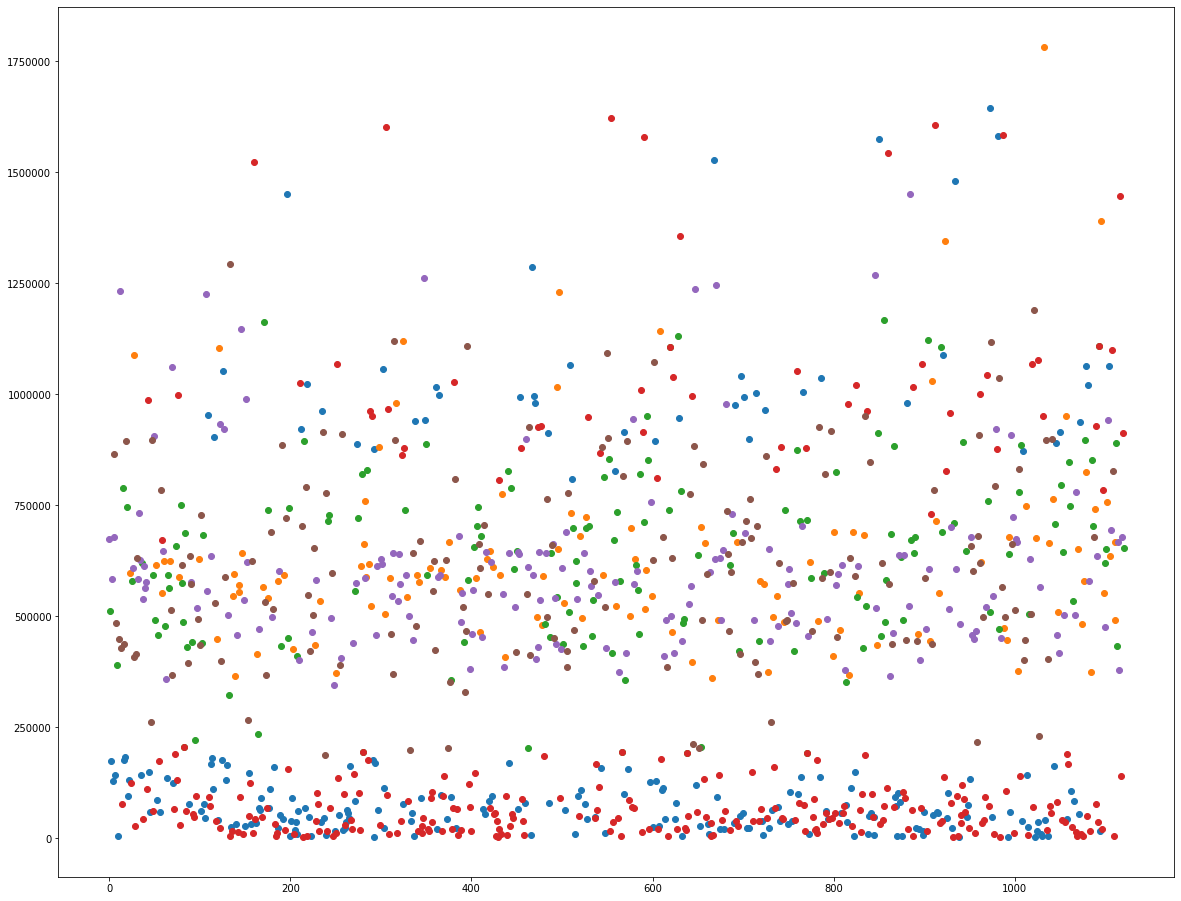

In [14]:


angle_gap = 60
plt.figure(figsize = (20,16))
for i in range(int(360 / angle_gap)):
    tmp_df = tot_ftr_df[(tot_ftr_df['A_phase_angle'] >= i * angle_gap) & (tot_ftr_df['A_phase_angle'] <= (i + 1) * angle_gap)]
    plt.plot(tmp_df['operation_times'], tmp_df['A_arcing_energy'],'o')
    #plt.ylim([0,2000000])

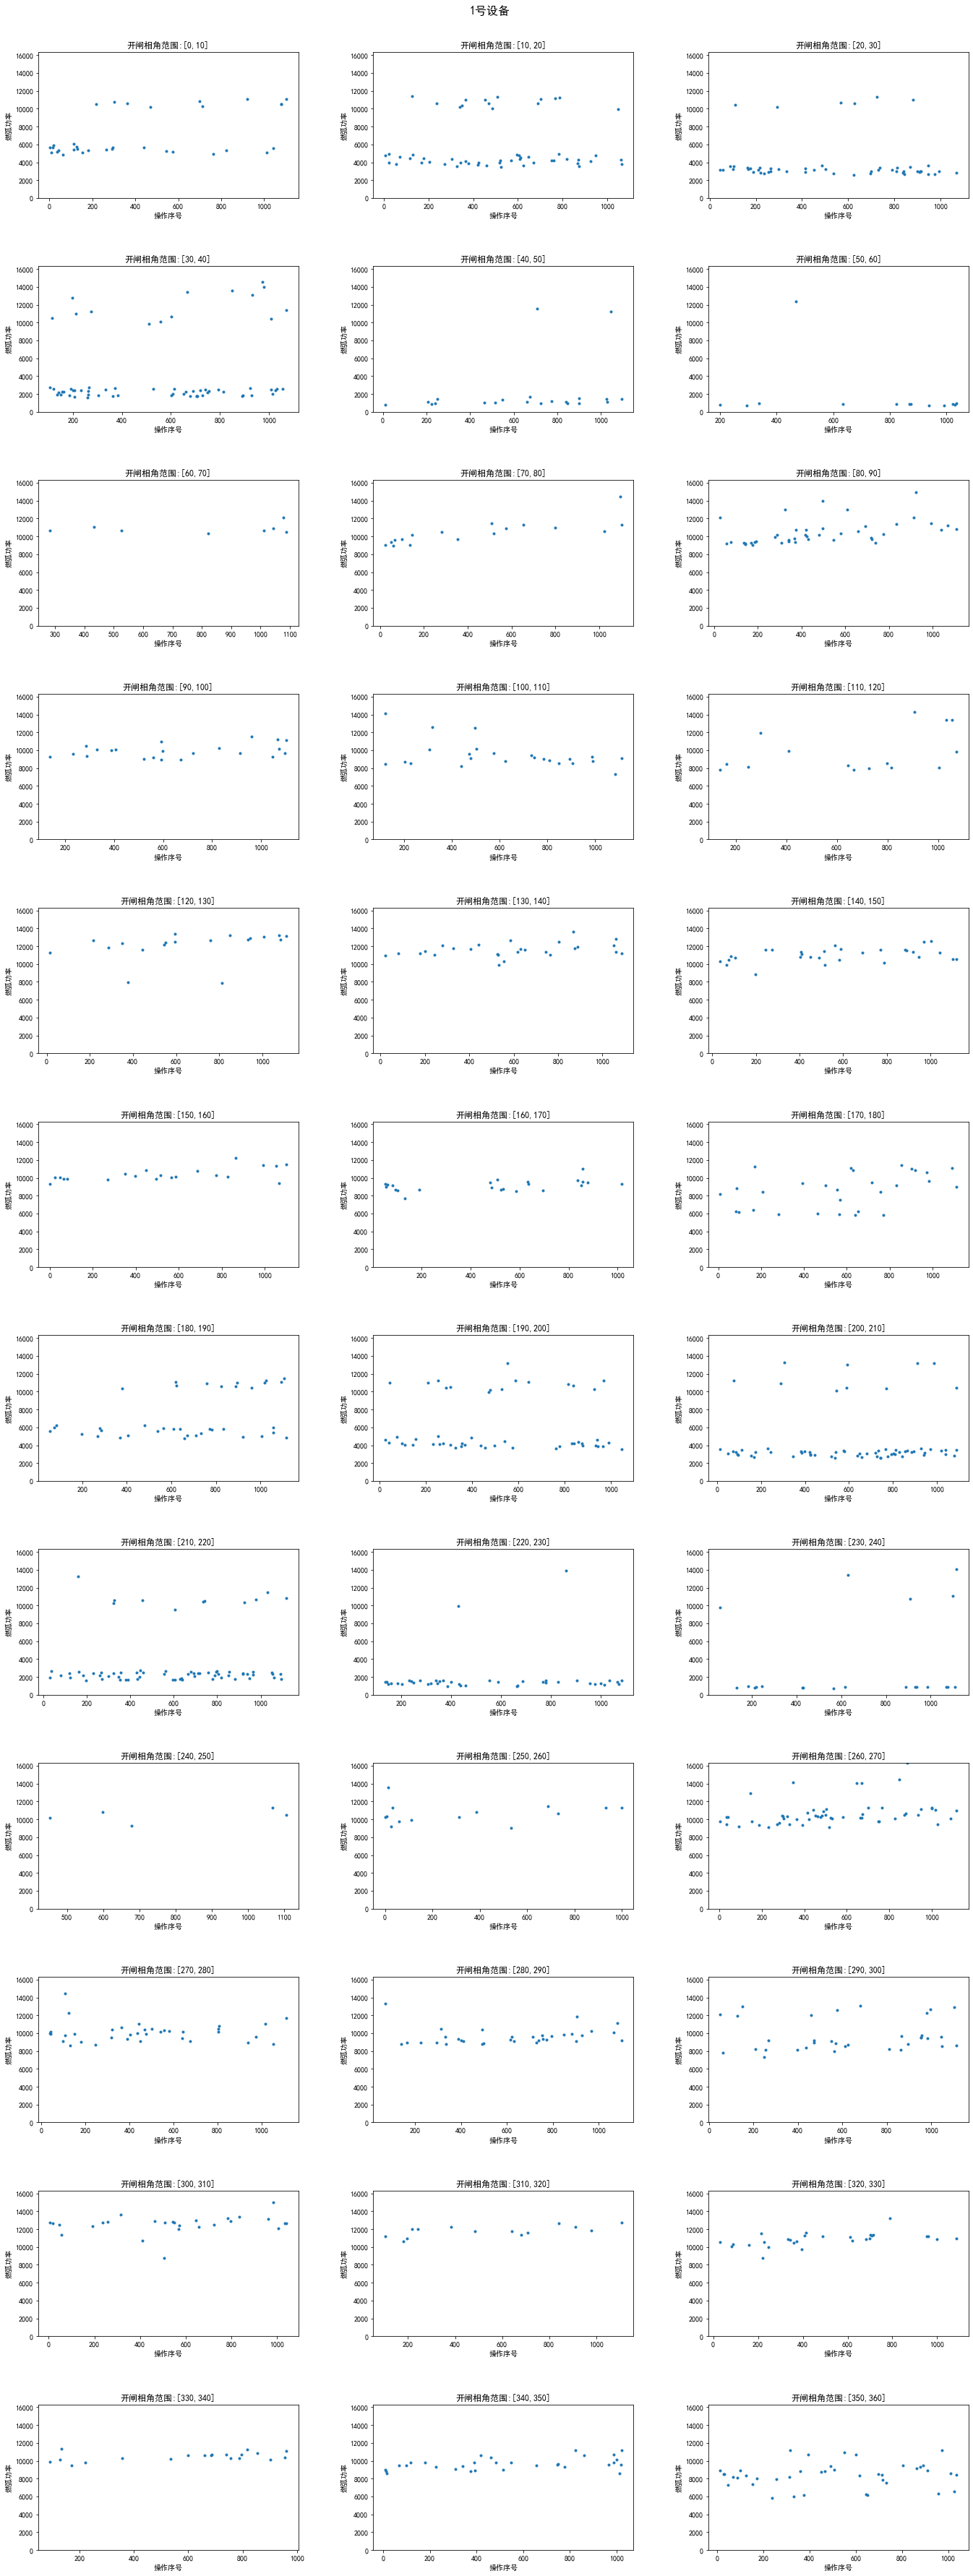

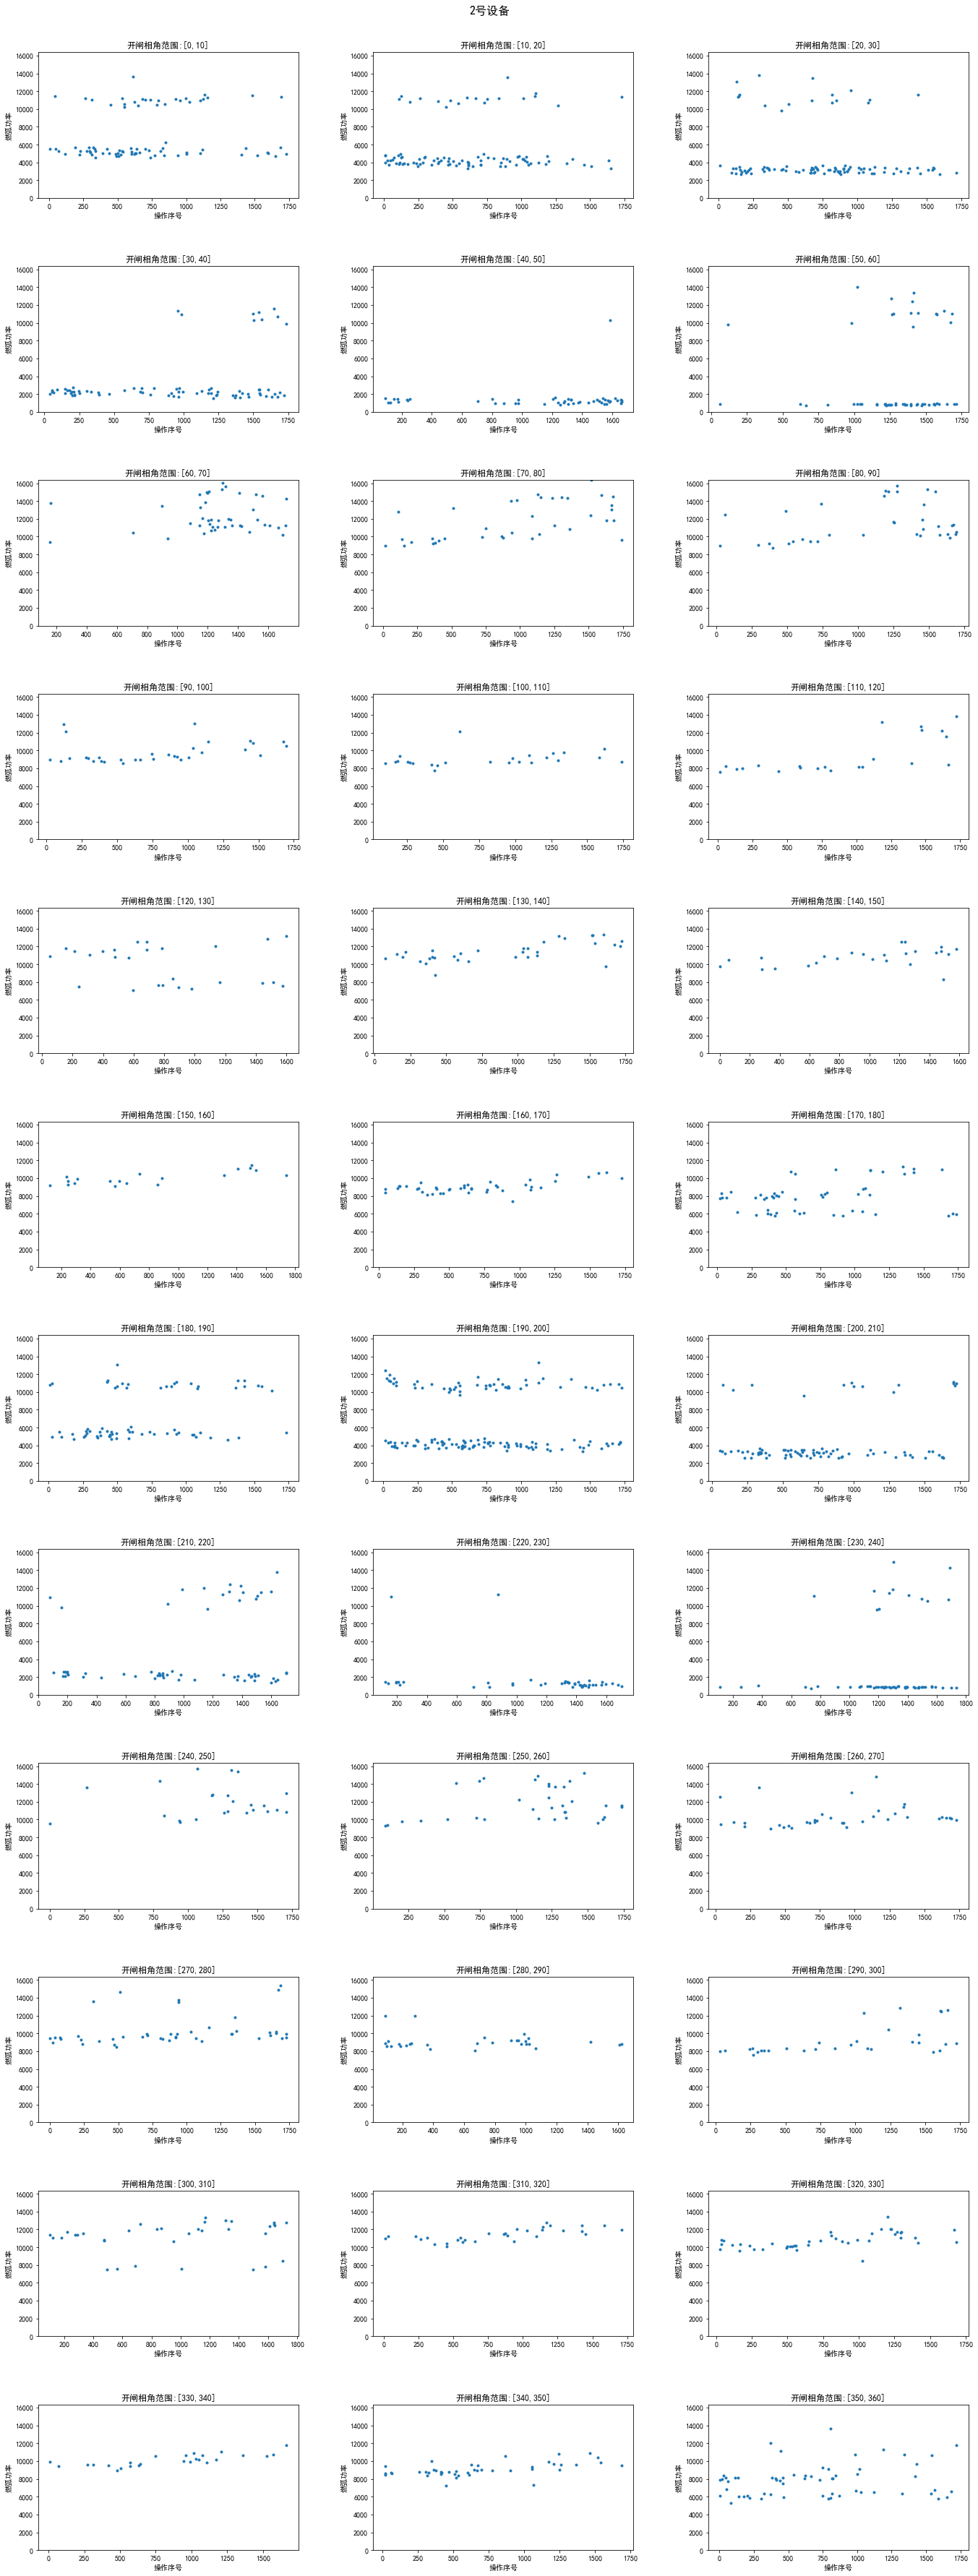

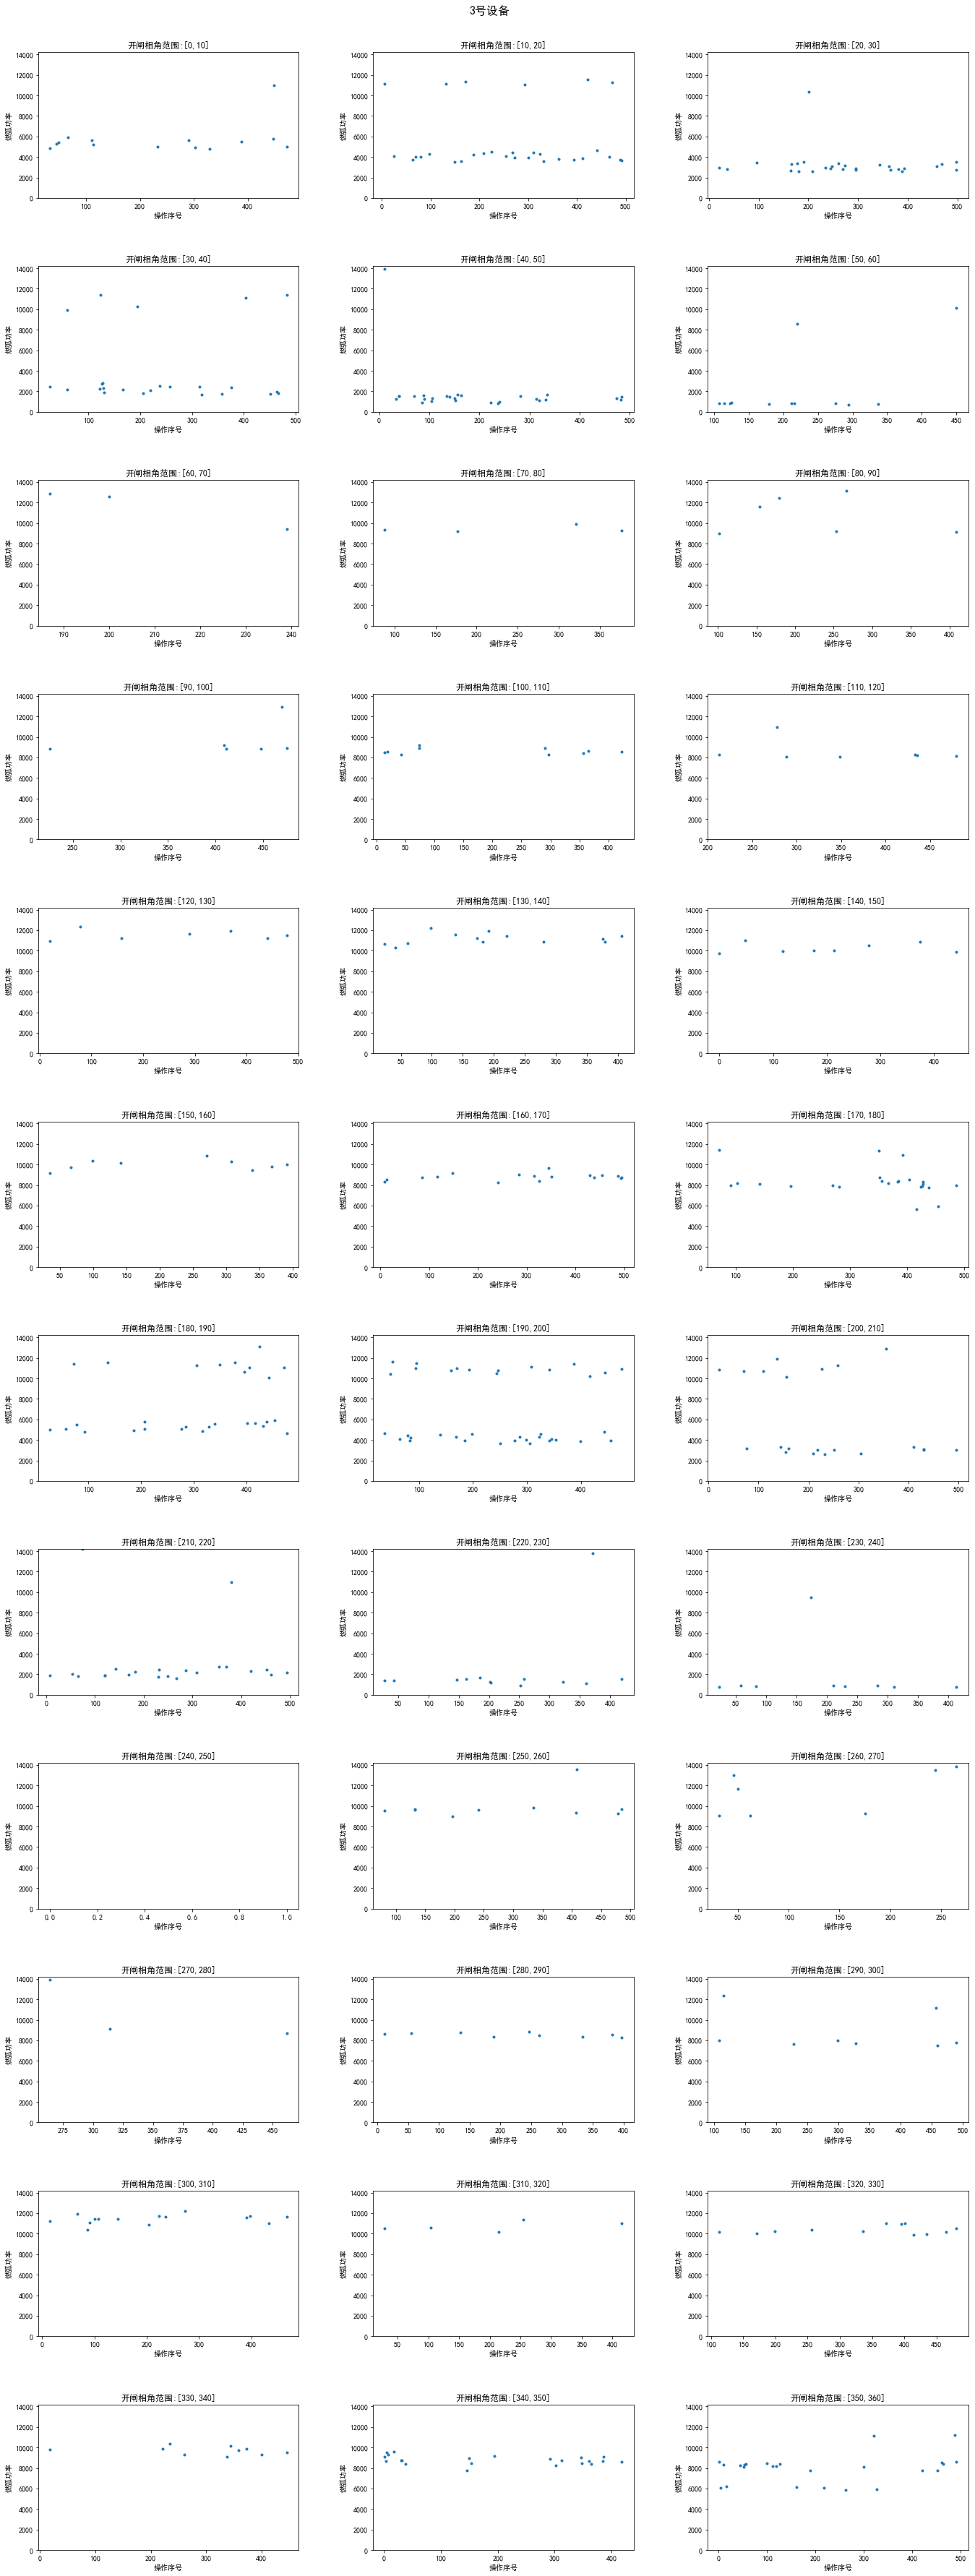

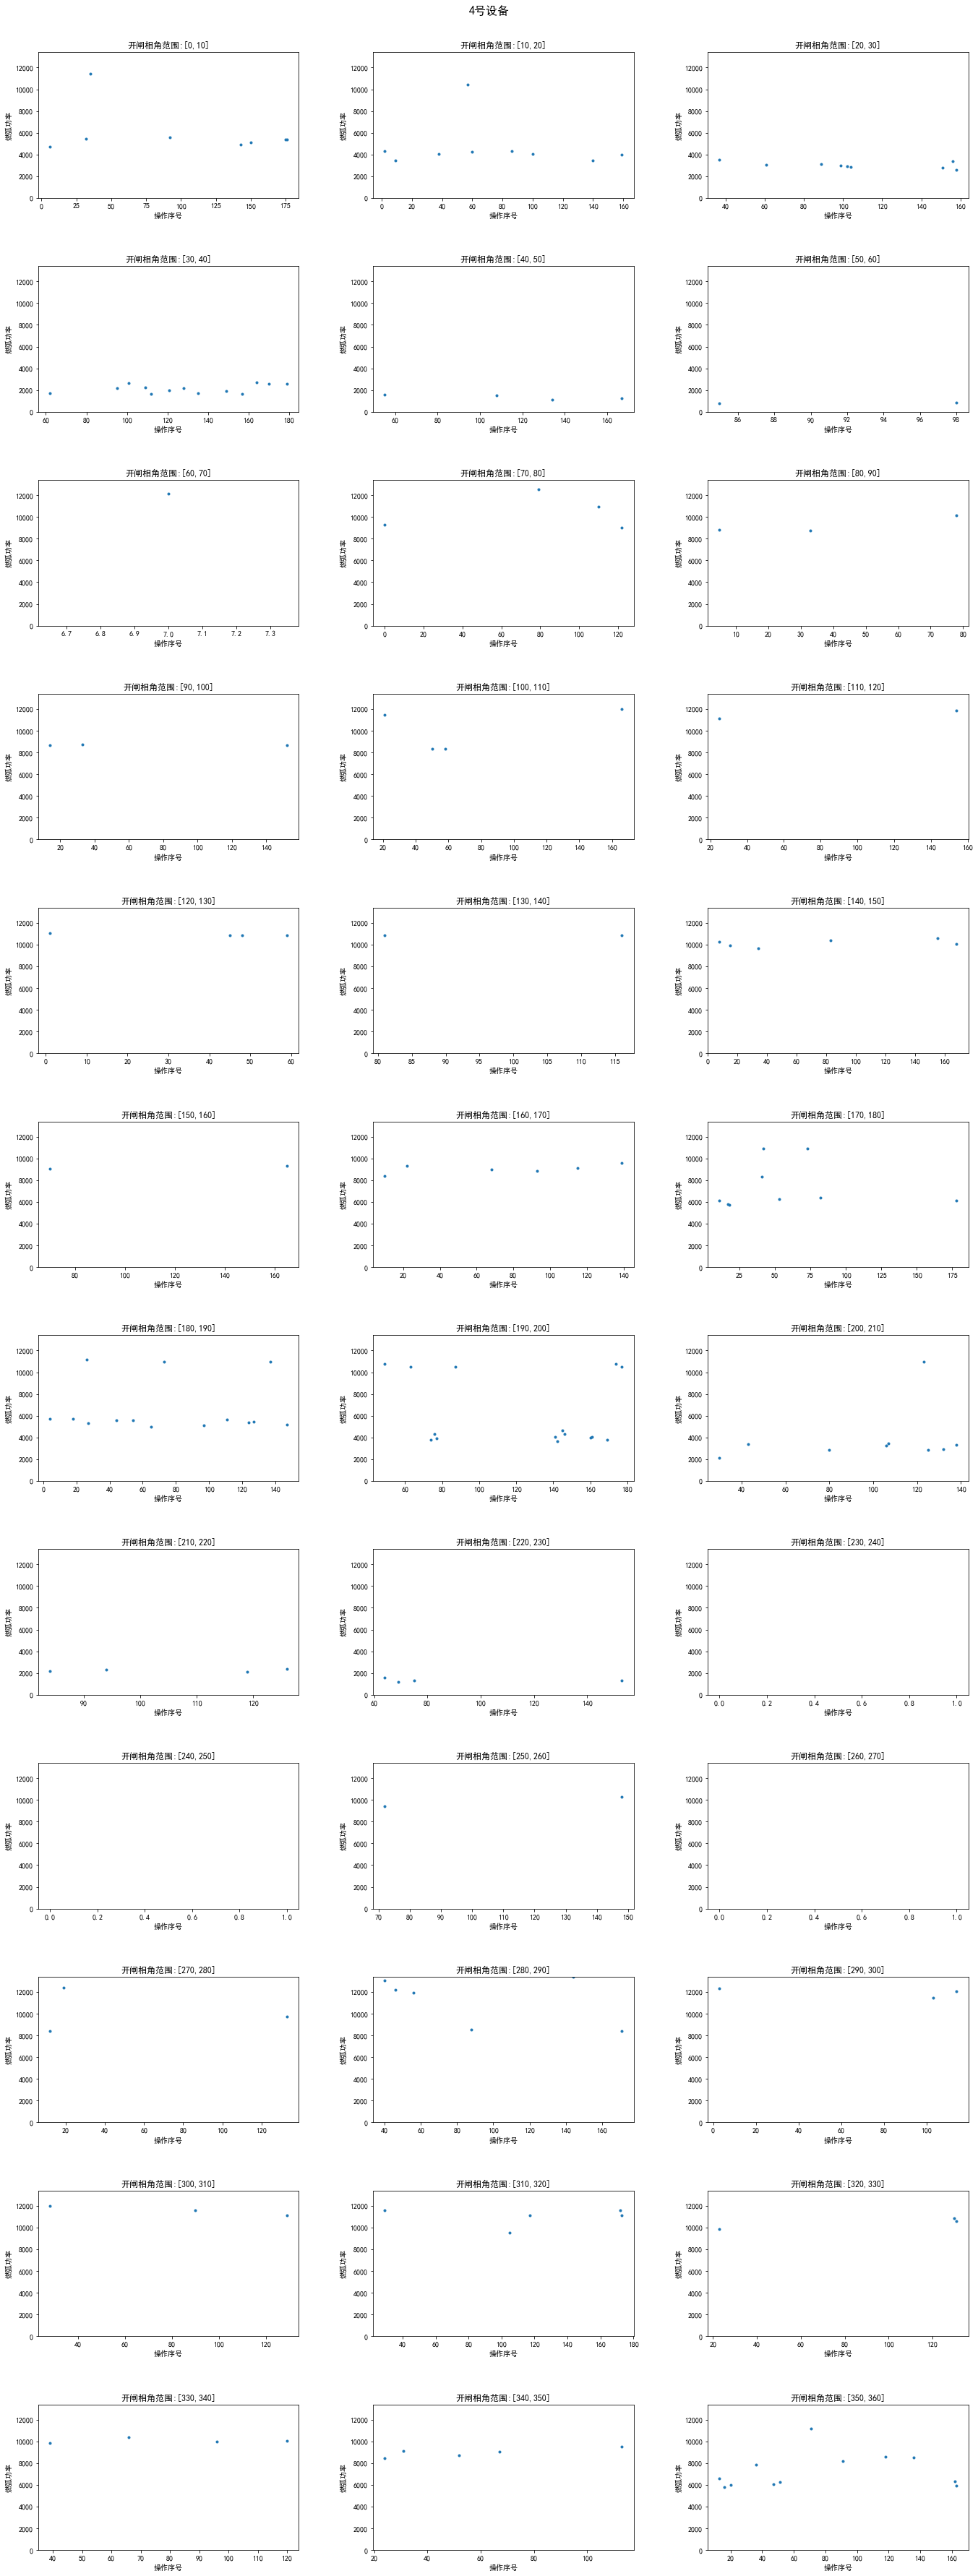

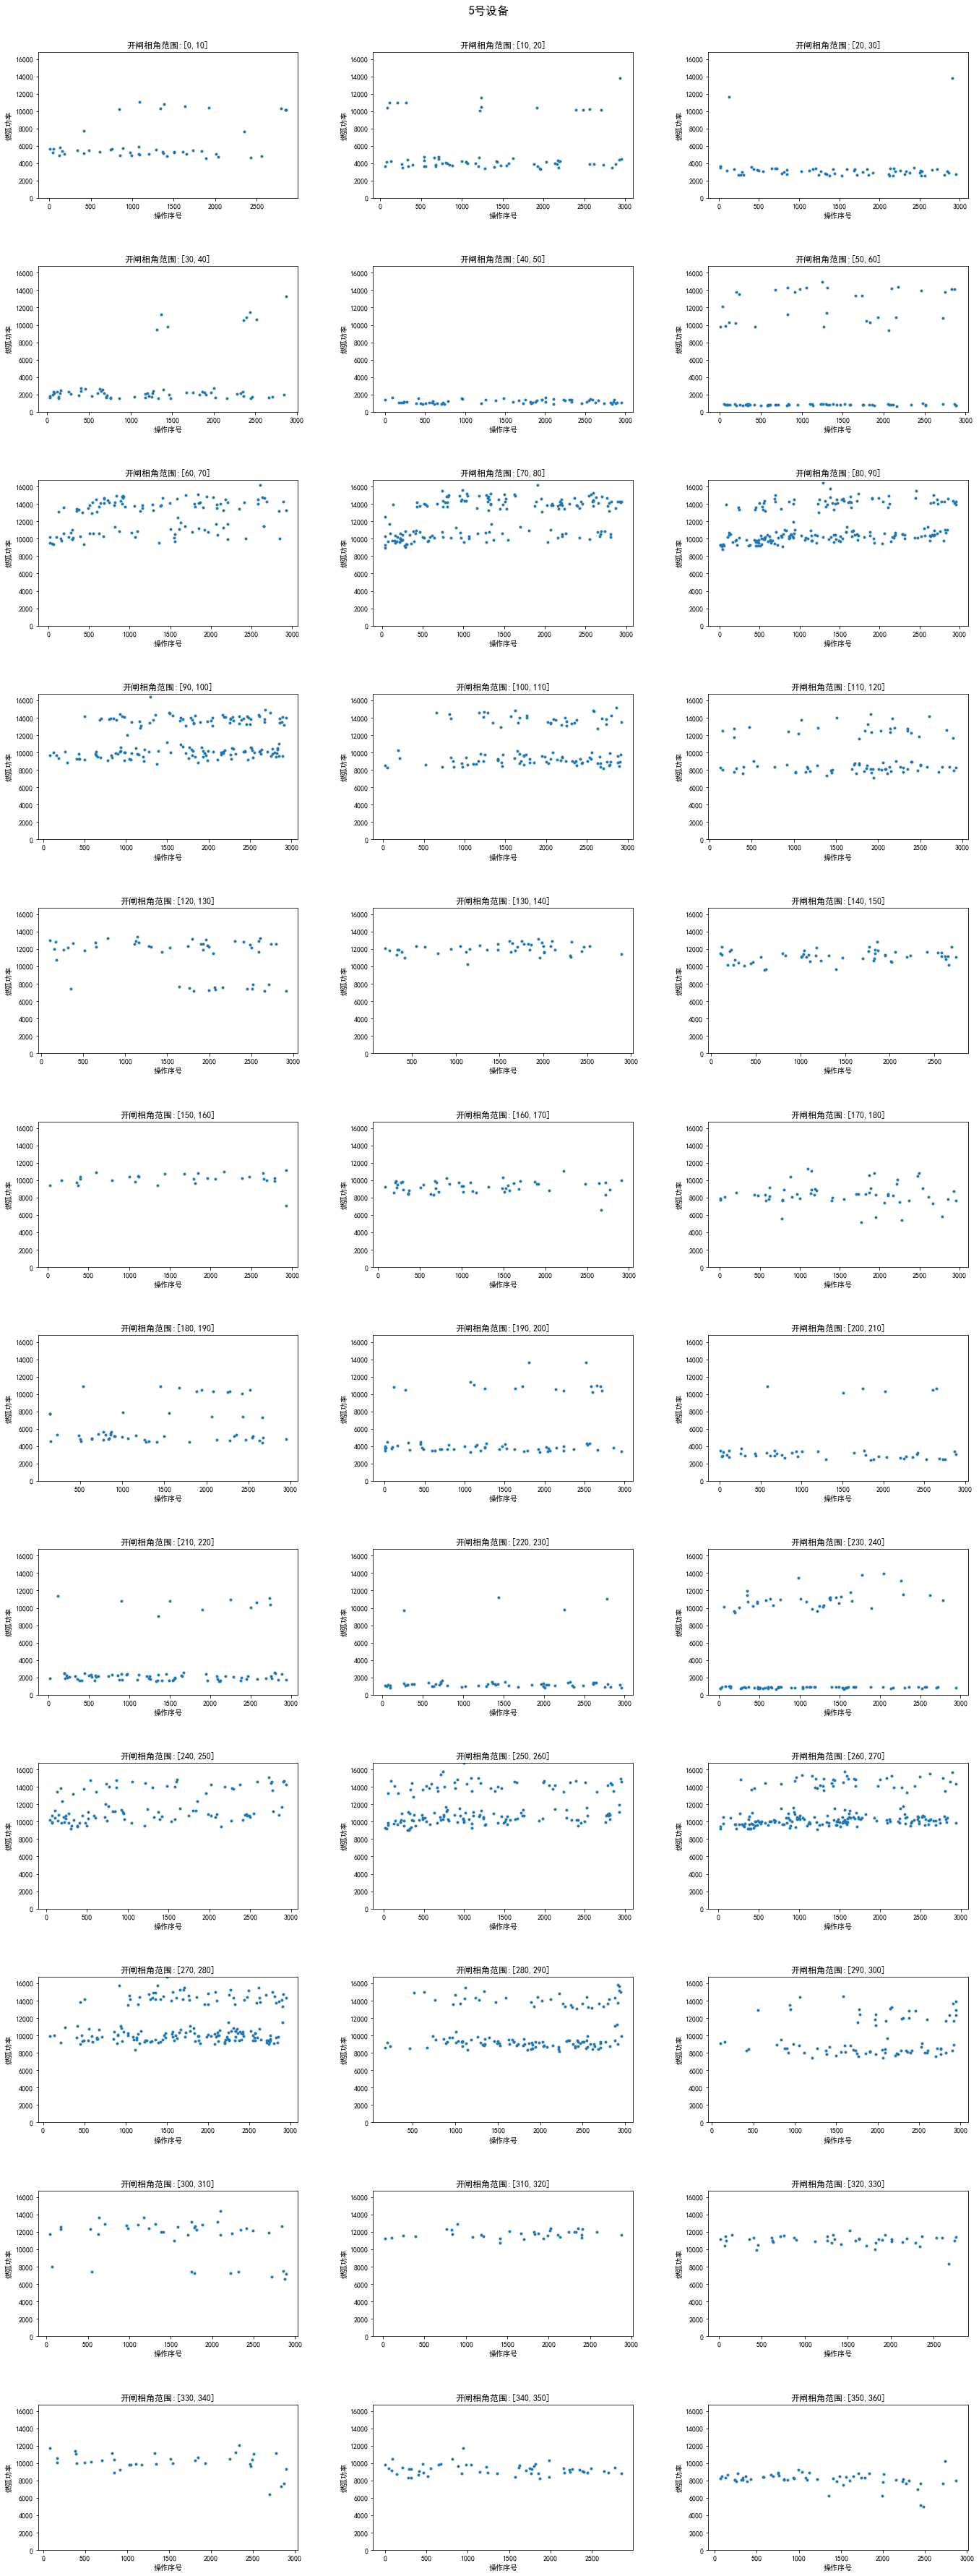

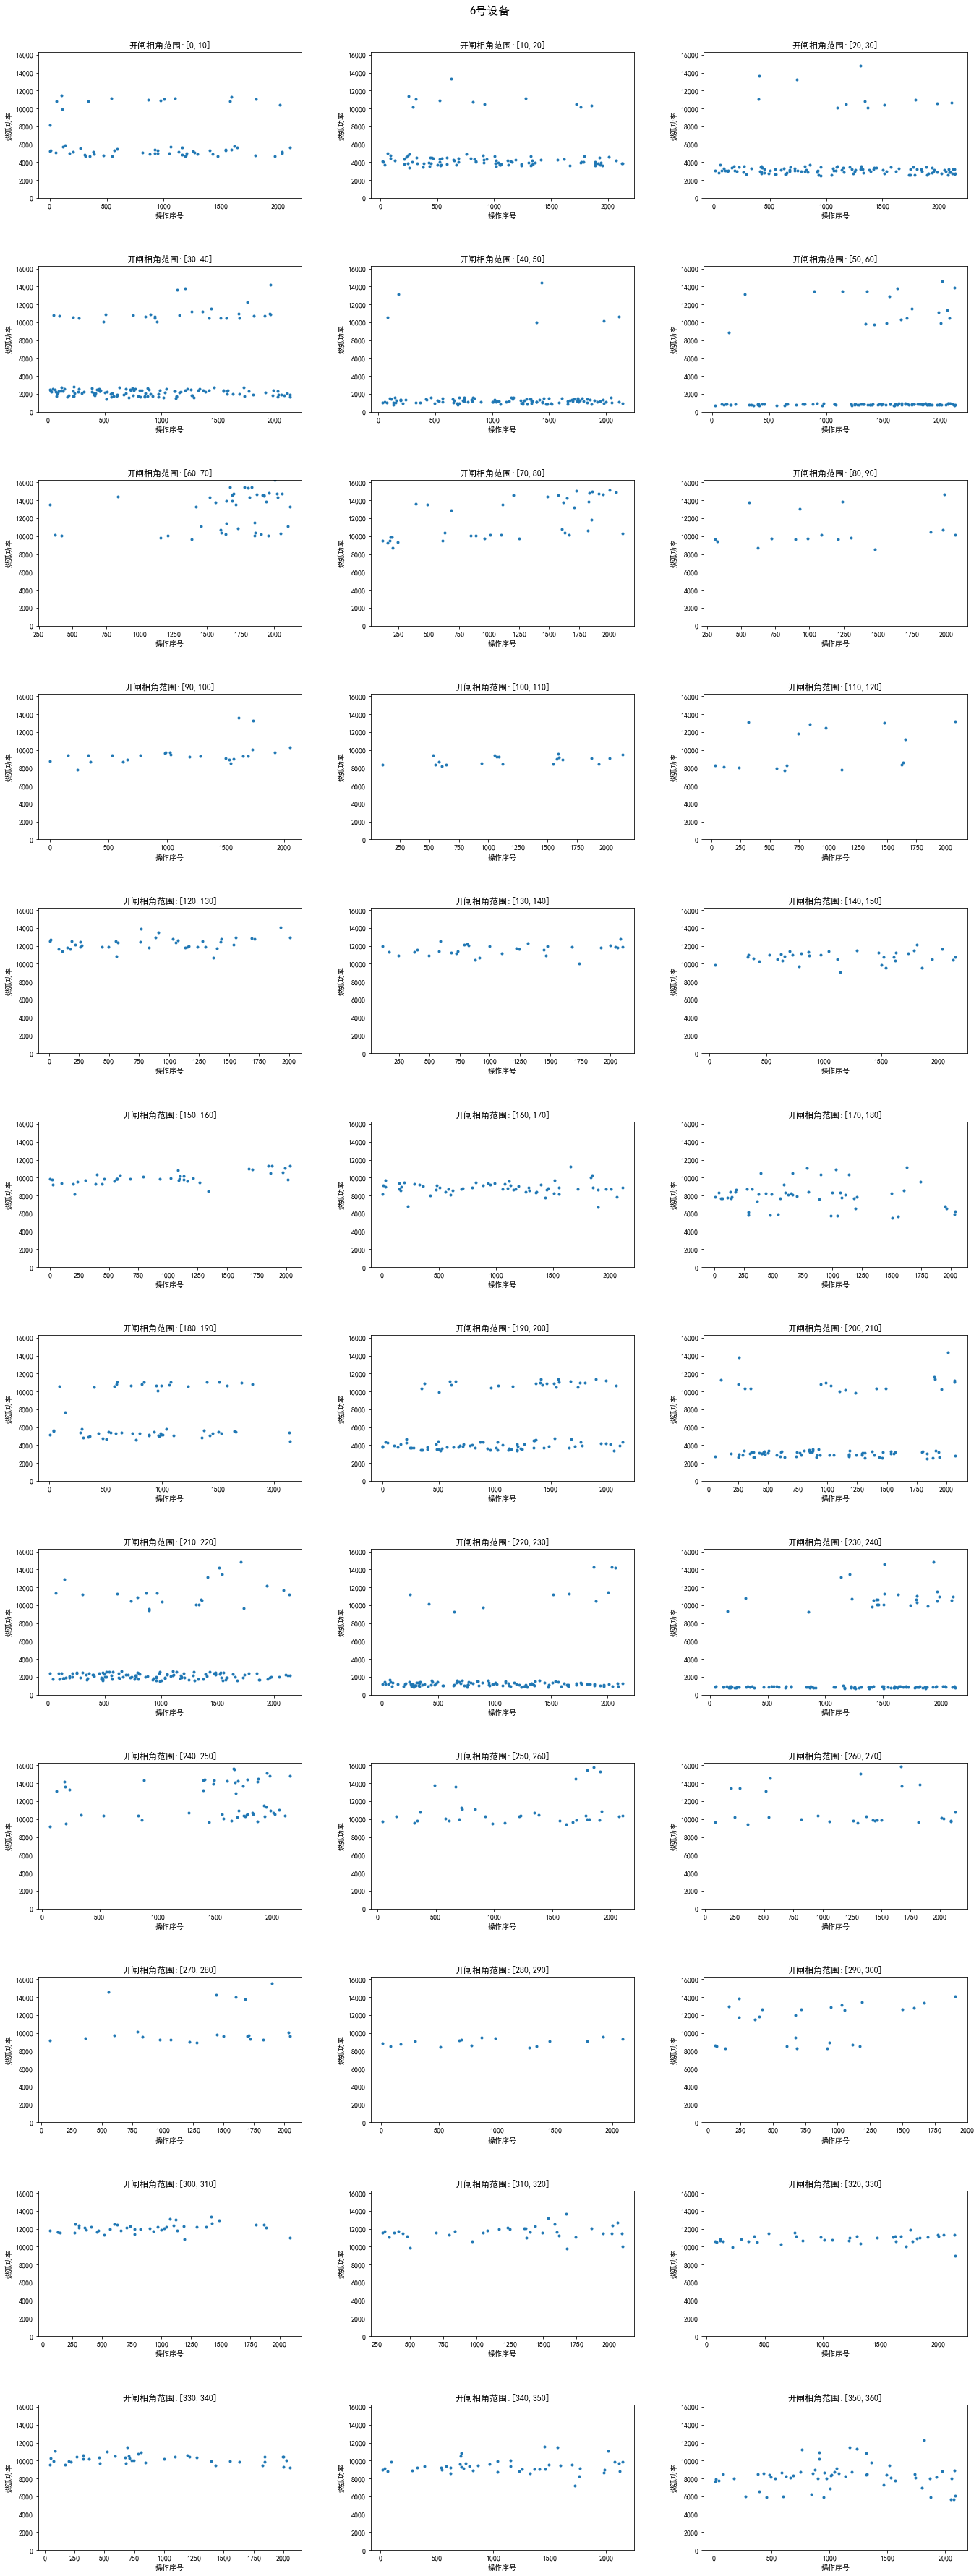

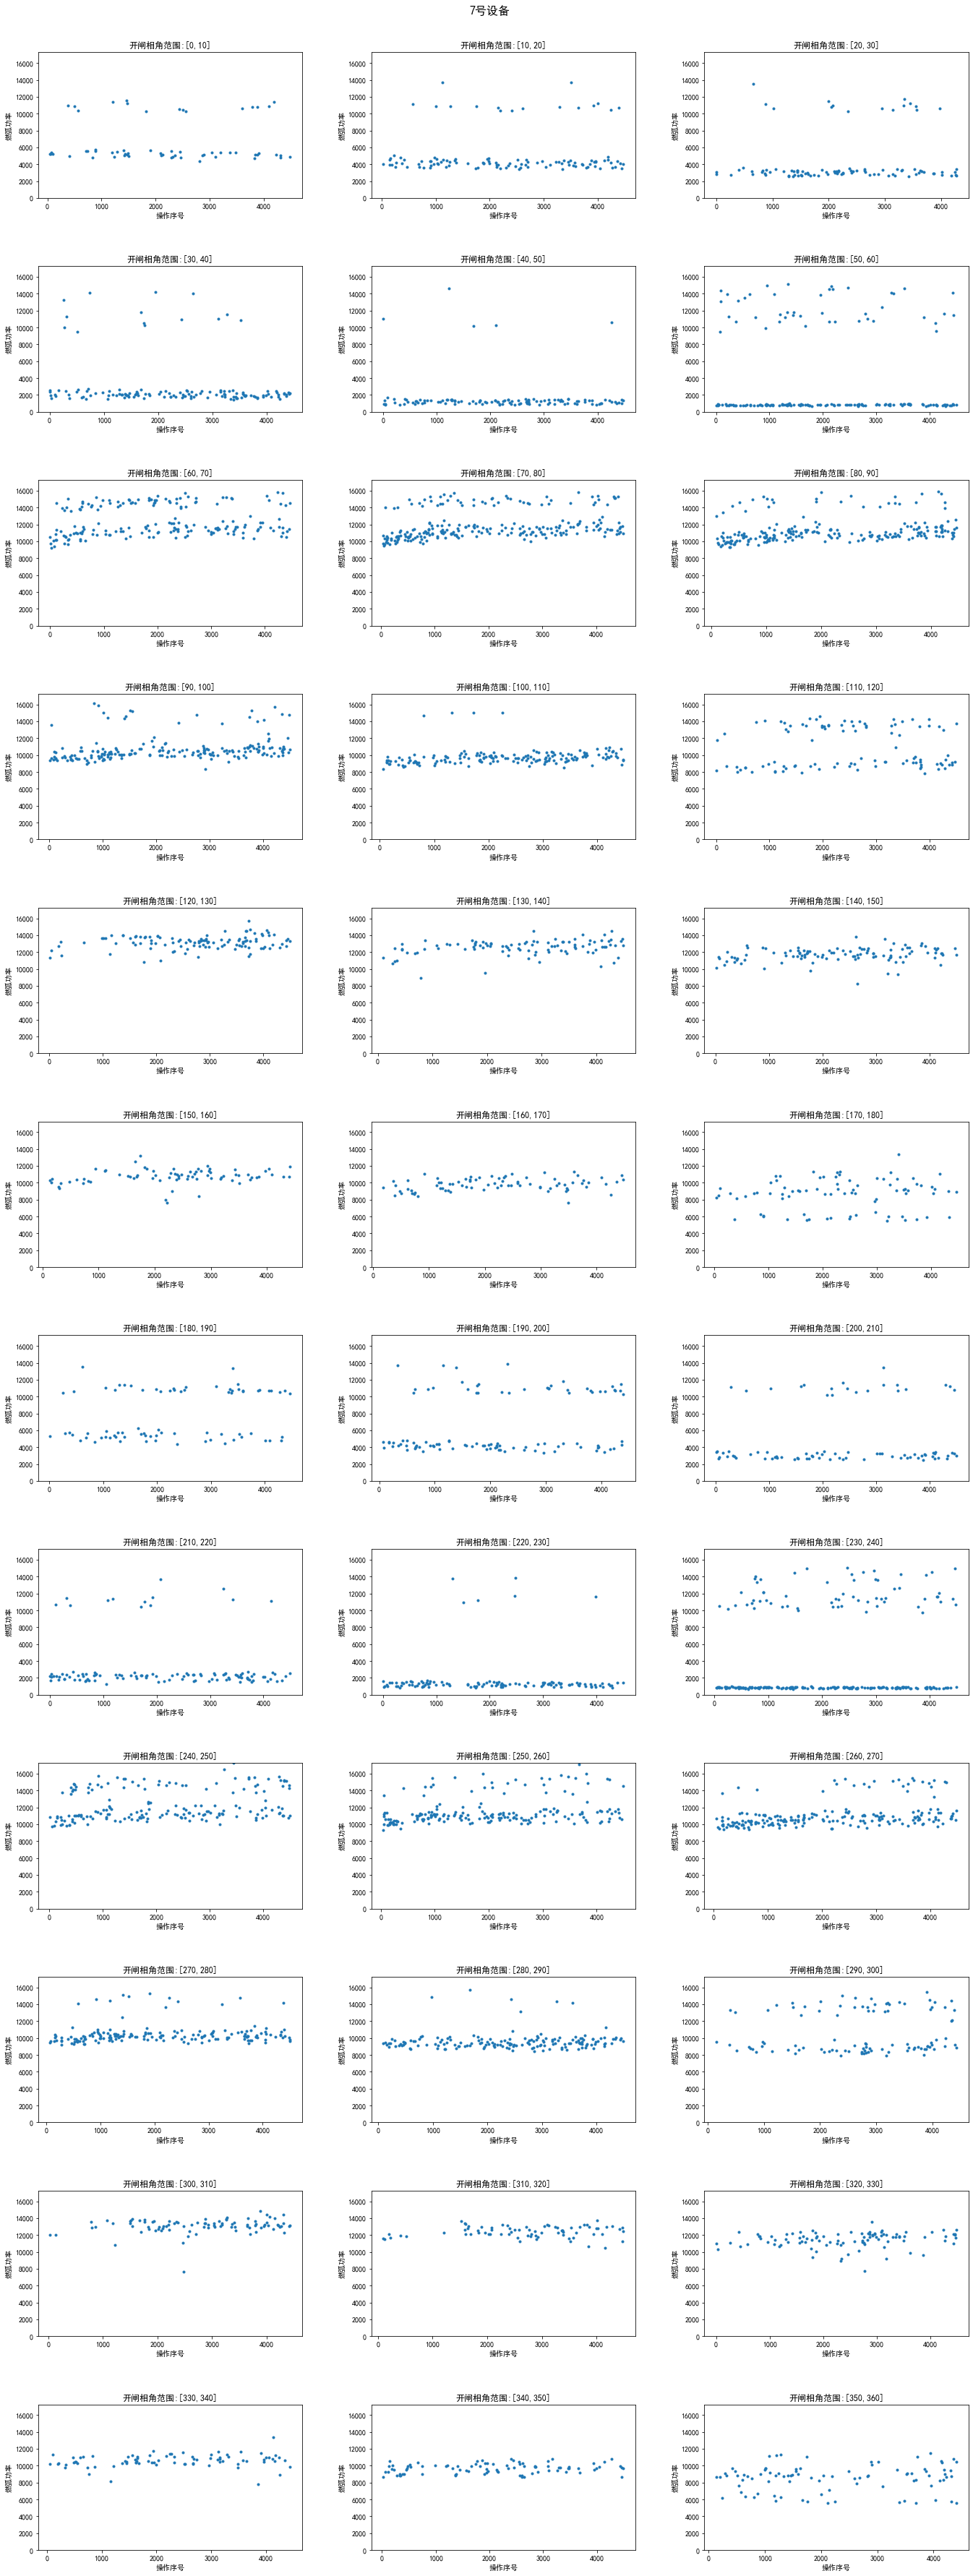

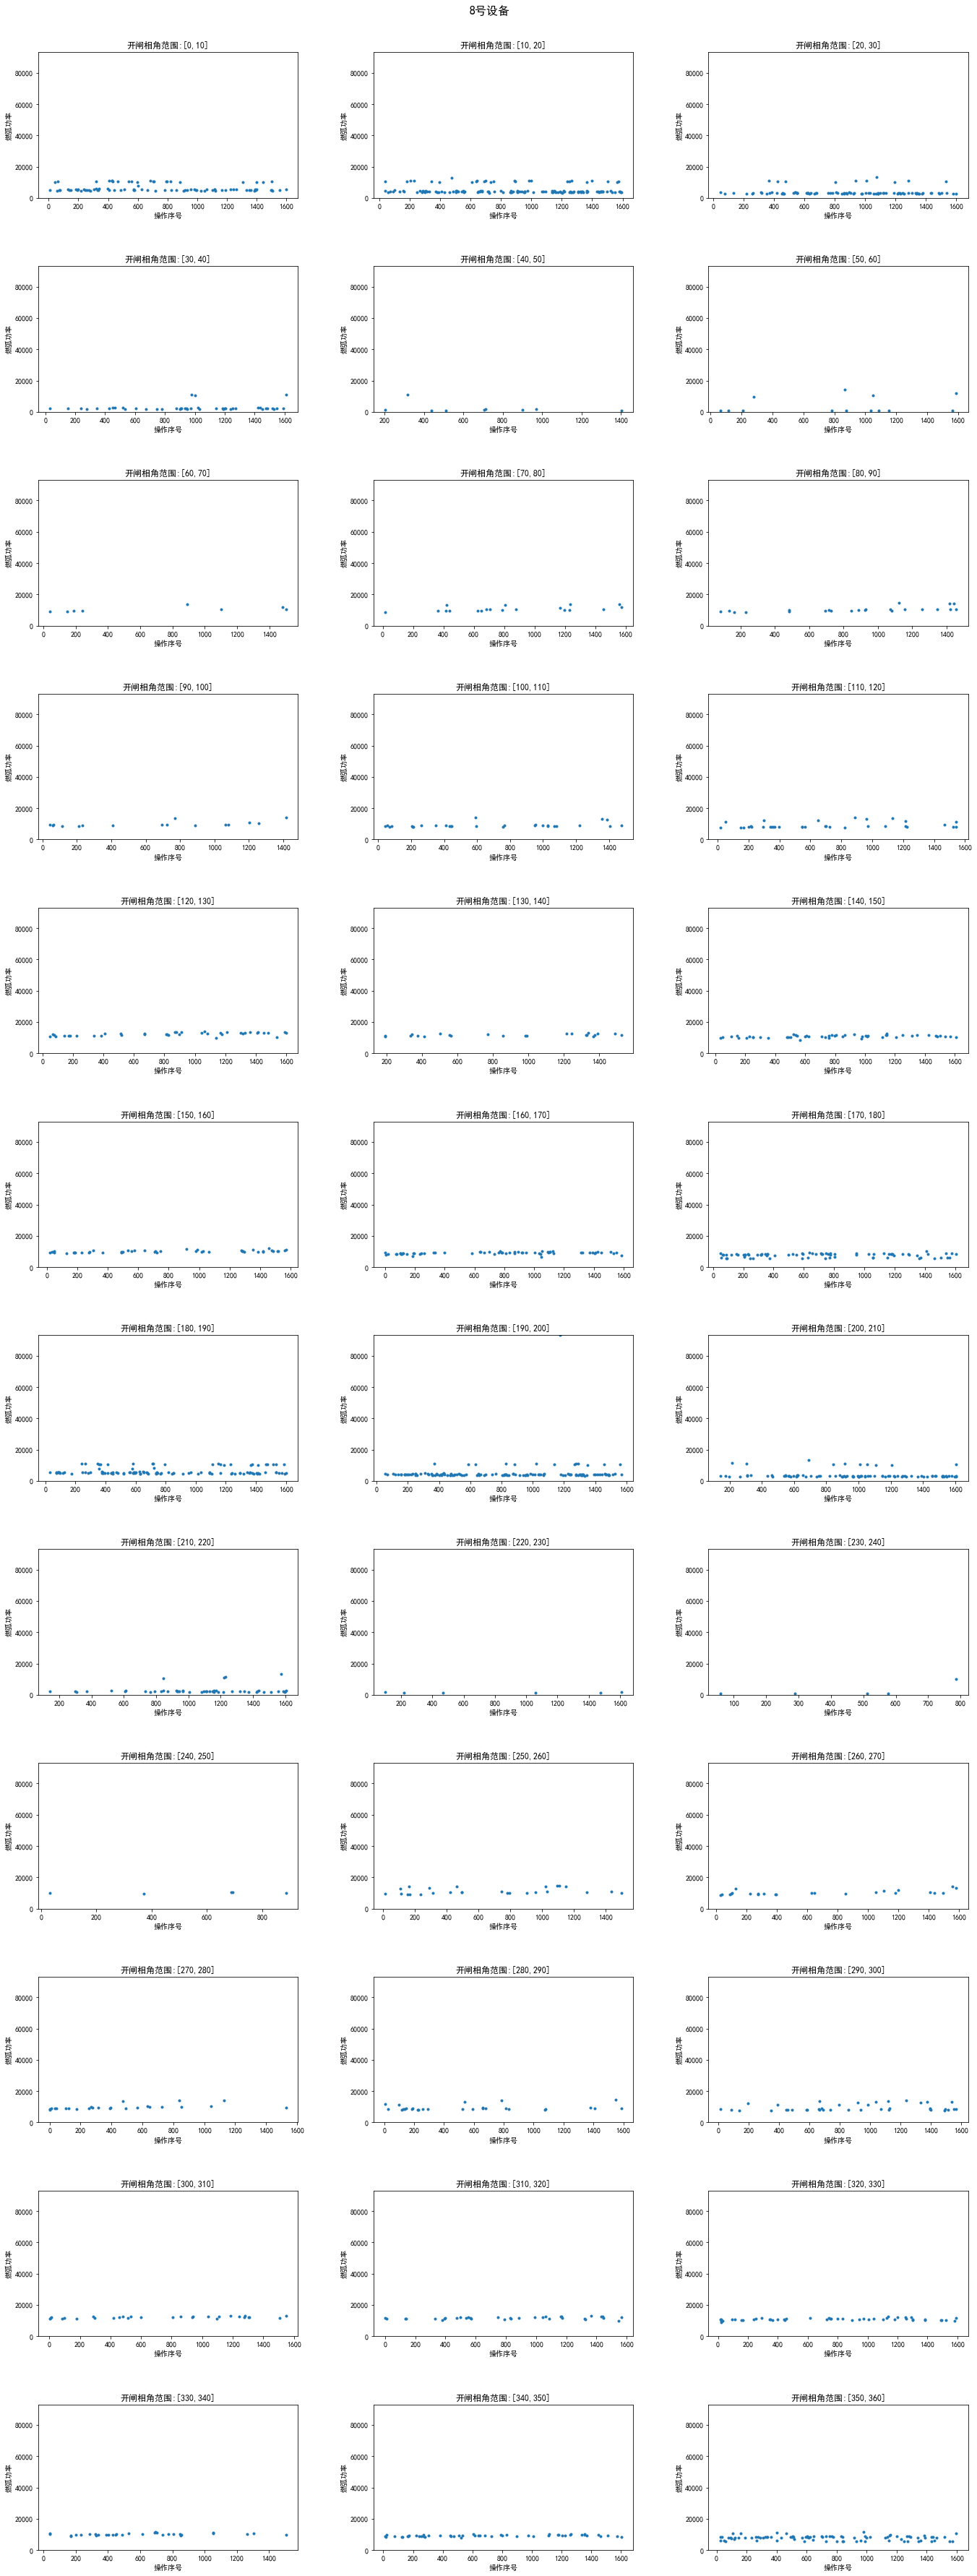

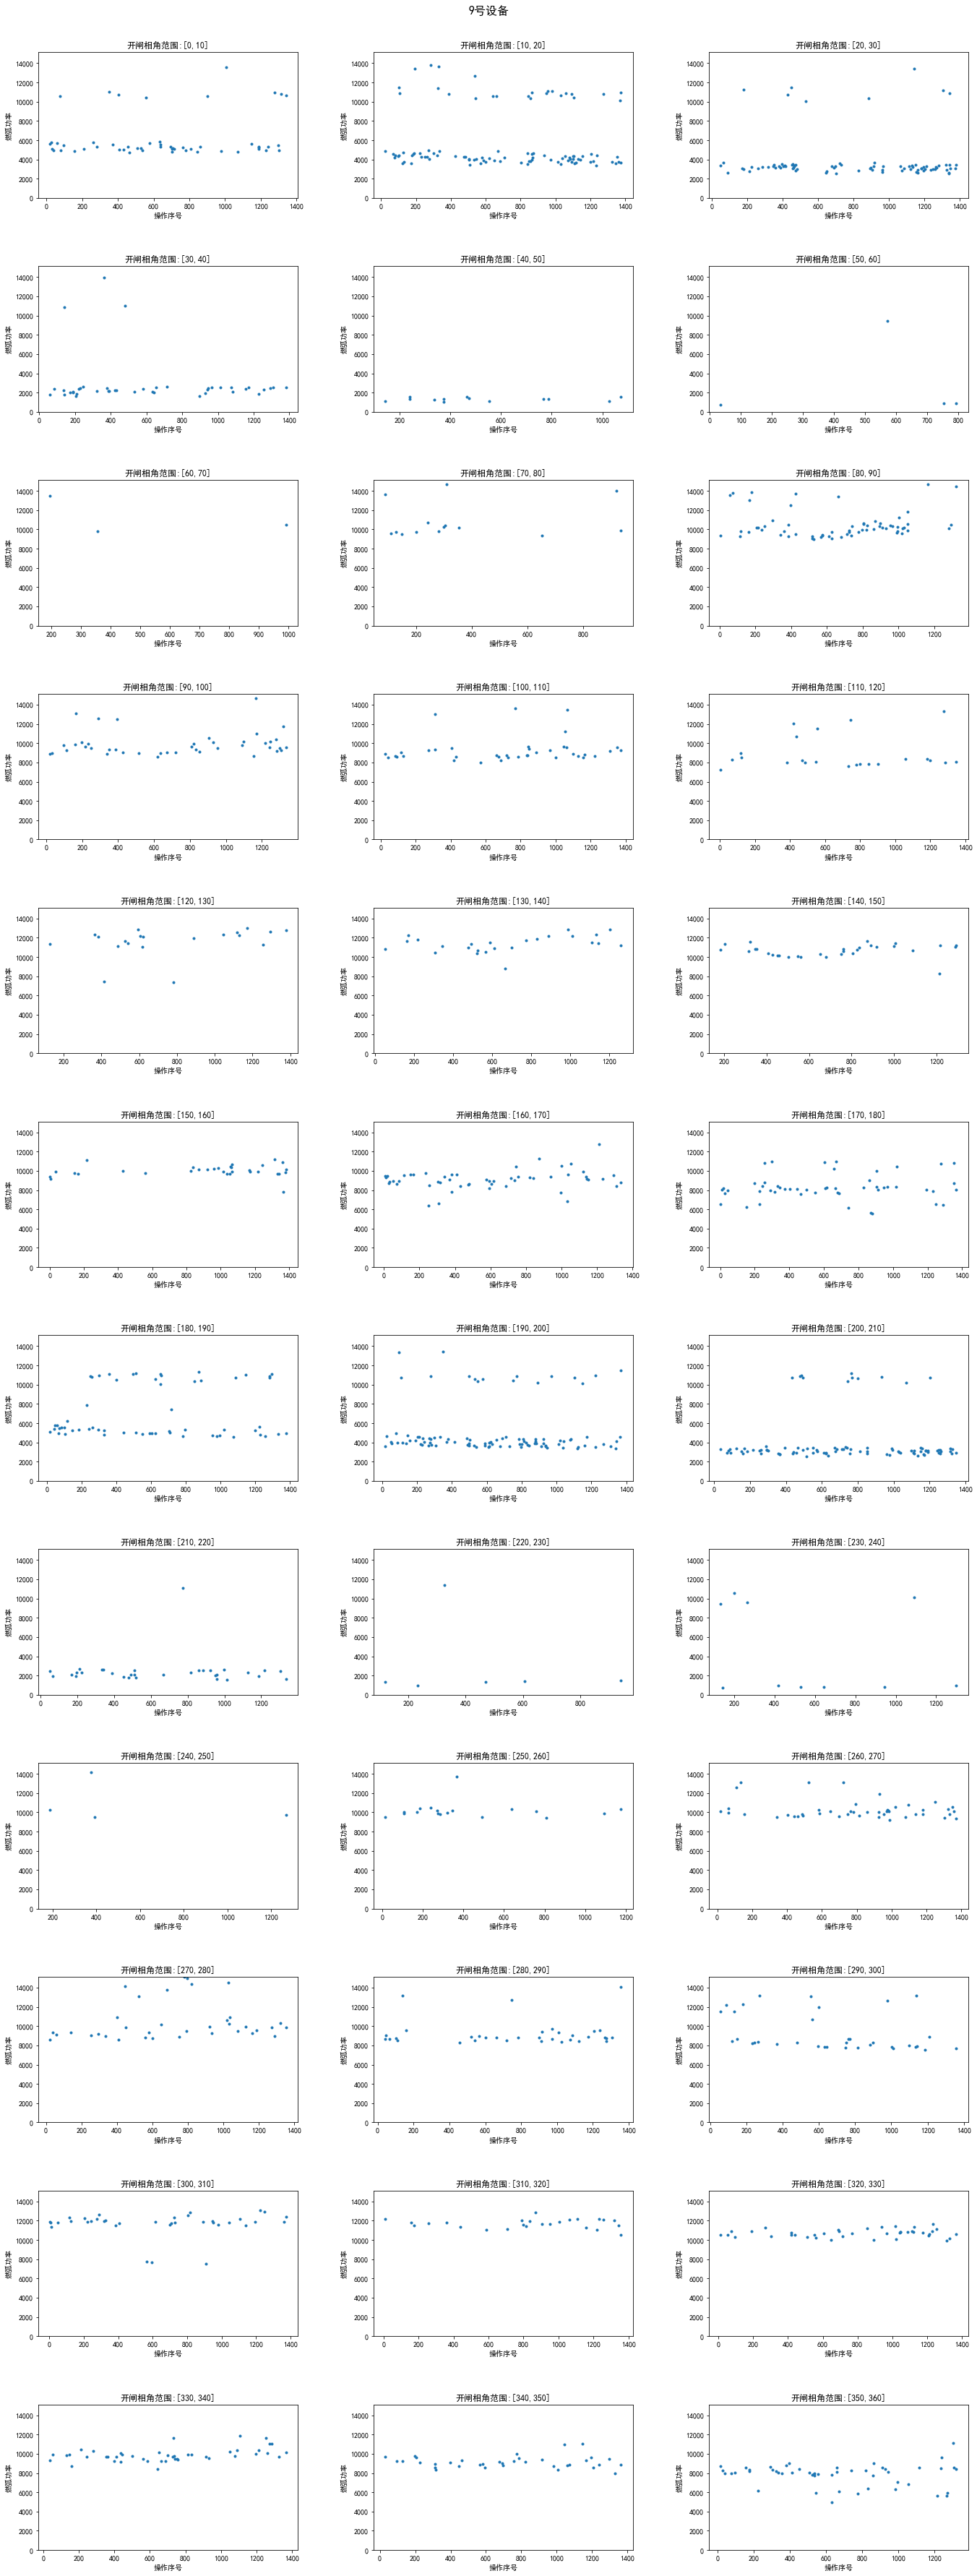

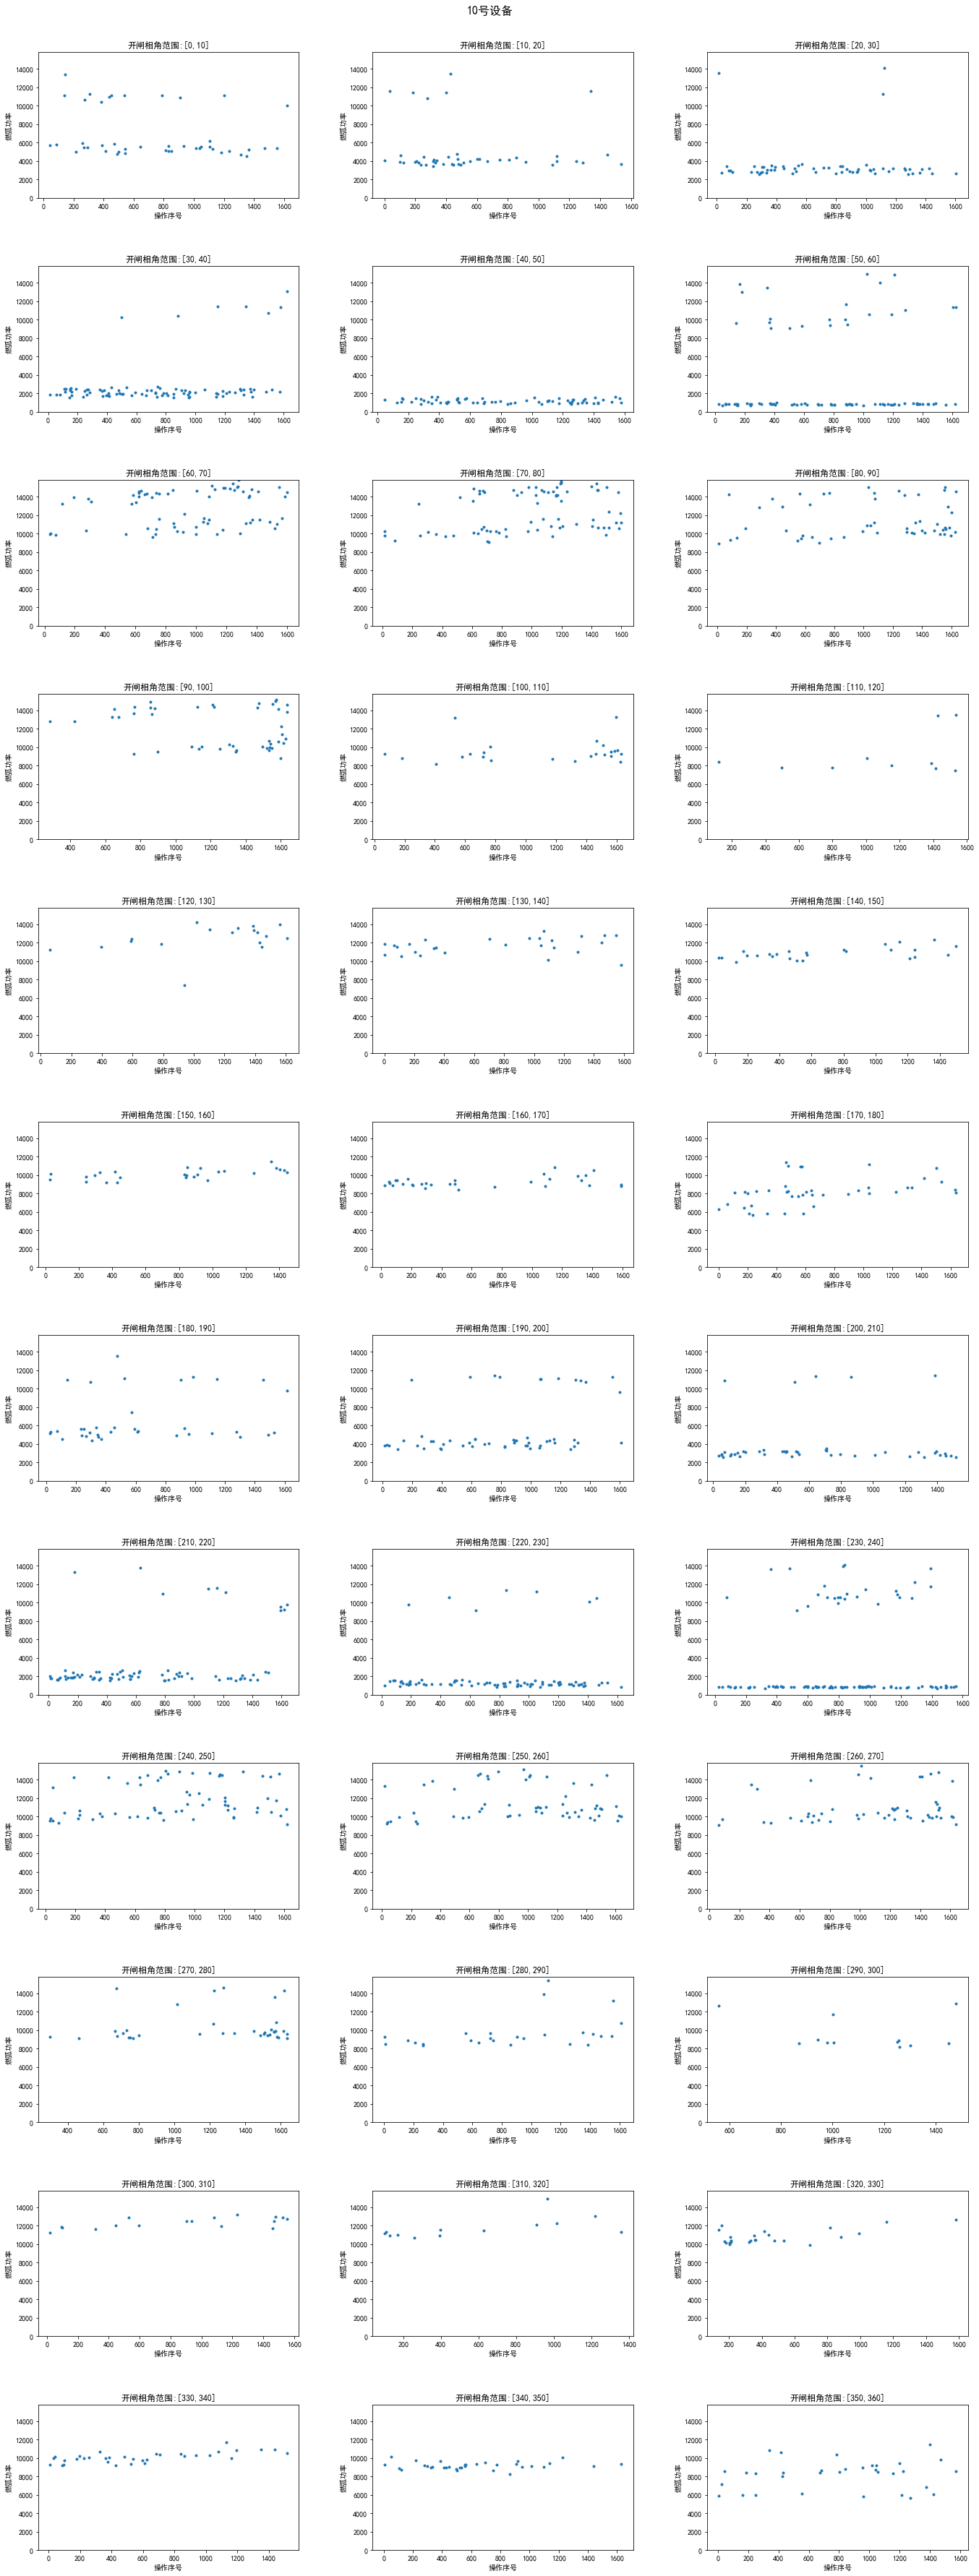

In [180]:
res_file_path = '../res/phase_angle/'
angle_gap = 10
res_angle_path = res_file_path + 'angle_' + str(angle_gap) + '/angle_power/'
if not os.path.exists(res_angle_path):
    os.makedirs(res_angle_path)


for machine_id in range(1, 11):#
    tot_ftr_df = pd.DataFrame()
    ftr_df = pd.read_csv(ftr_path + str(machine_id) + '.csv')
    ftr_df['machine_id'] = machine_id
    ftr_df['operation_times'] = ftr_df.index
    tot_ftr_df = tot_ftr_df.append(ftr_df, ignore_index = True)
    
    fig = plt.figure(figsize = (20,50))
    #fig = plt.figure(figsize = (30,16))
    fig.suptitle(str(machine_id) + '号设备',fontsize=16,y=1)
    #plt.subplots_adjust(hspace=0.5,wspace=0.2)
    #解决中文显示问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    y_max = max(tot_ftr_df['A_arcing_power'])
    n_h_plots = 3
    for i in range(int(360 / angle_gap)):
        plt.subplot(int(360 / angle_gap / n_h_plots),n_h_plots,i + 1)
        plt.tight_layout(pad=5) 
        tmp_df = tot_ftr_df[(tot_ftr_df['A_phase_angle'] >= i * angle_gap) & (tot_ftr_df['A_phase_angle'] <= (i + 1) * angle_gap)]
        plt.plot(tmp_df['operation_times'], tmp_df['A_arcing_power'],'.')
        plt.title('开闸相角范围:[' + str(i * angle_gap) +','+ str((i + 1) * angle_gap)+']')
        plt.xlabel('操作序号')
        plt.ylabel('燃弧功率')
        plt.ylim([0,y_max + 2])
        #plt.ylim([0,2000000])
        
    fig.savefig(res_angle_path + 'x_angle_y_power_machine_' +str(machine_id) + '.png', dpi=100,bbox_inches ='tight')
    

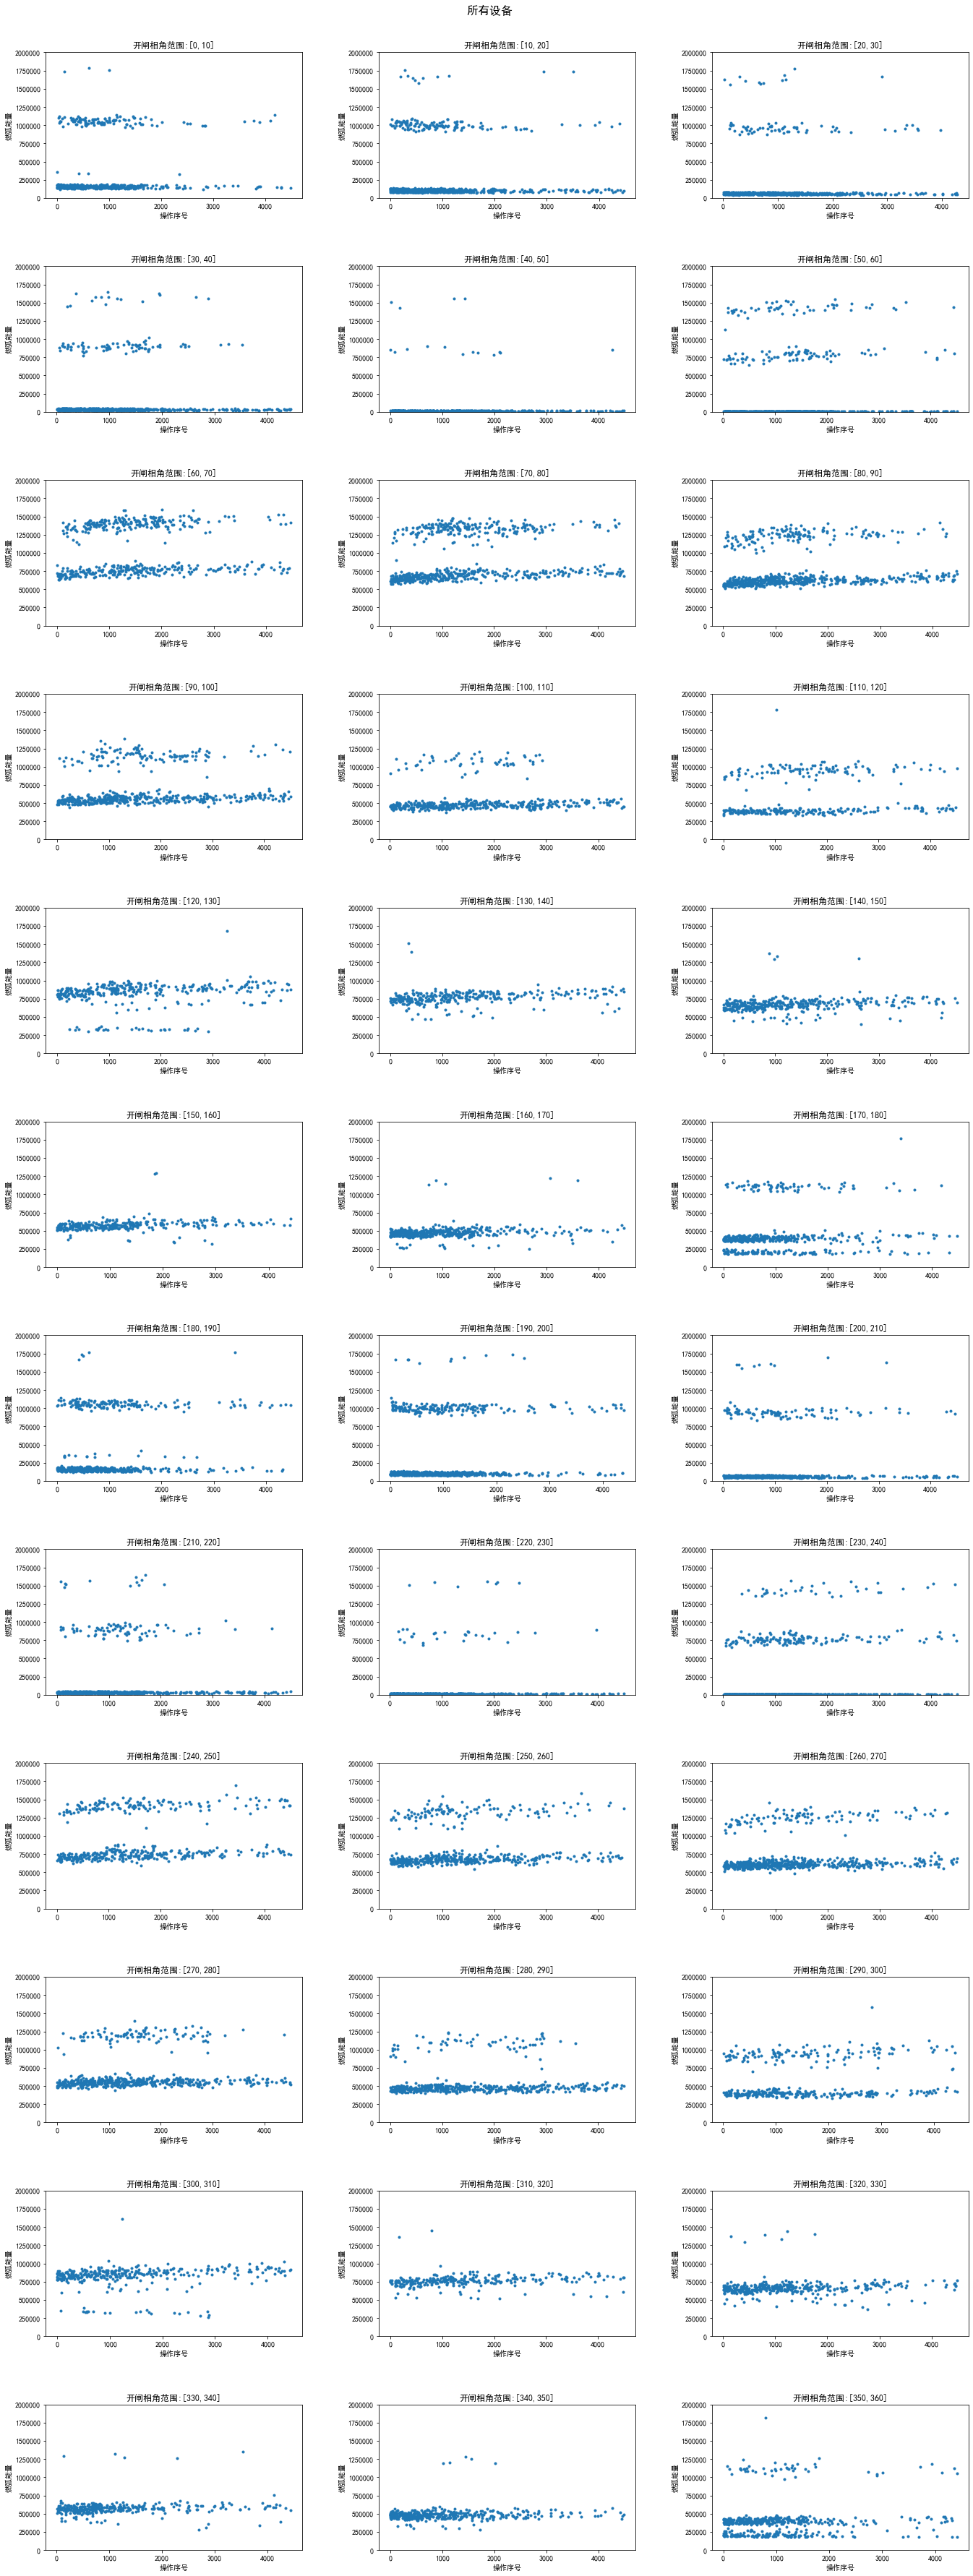

In [204]:
res_file_path = '../res/phase_angle/'
angle_gap = 10
res_angle_path = res_file_path + 'angle_' + str(angle_gap) + '/angle_energy/'
if not os.path.exists(res_angle_path):
    os.makedirs(res_angle_path)


tot_ftr_df = pd.DataFrame()
for machine_id in range(1, 11):#
    ftr_df = pd.read_csv(ftr_path + str(machine_id) + '.csv')
    ftr_df['machine_id'] = machine_id
    ftr_df['operation_times'] = ftr_df.index
    tot_ftr_df = tot_ftr_df.append(ftr_df, ignore_index = True)
    
fig = plt.figure(figsize = (20,50))
fig.suptitle('所有设备',fontsize=16,y=1)
#plt.subplots_adjust(hspace=0.5,wspace=0.2)
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

y_max = max(tot_ftr_df['A_arcing_energy'])
for i in range(int(360 / angle_gap)):
    plt.subplot(int(360 / angle_gap / n_h_plots),n_h_plots,i + 1)
    plt.tight_layout(pad=5) 
    tmp_df = tot_ftr_df[(tot_ftr_df['A_phase_angle'] >= i * angle_gap) & (tot_ftr_df['A_phase_angle'] <= (i + 1) * angle_gap)]
    plt.plot(tmp_df['operation_times'], tmp_df['A_arcing_energy'],'.')
    plt.title('开闸相角范围:[' + str(i * angle_gap) +','+ str((i + 1) * angle_gap)+']')
    plt.xlabel('操作序号')
    plt.ylabel('燃弧能量')
    #plt.ylim([0,y_max + 2])
    plt.ylim([0,2000000])

fig.savefig(res_angle_path + 'x_angle_y_energy_tot_machine.png', dpi=100,bbox_inches ='tight')
    

In [150]:
angle_gap = 180
res_angle_path = res_file_path + 'angle_' + str(angle_gap) + '/angle_energy/'
if not os.path.exists(res_angle_path):
    os.makedirs(res_angle_path)

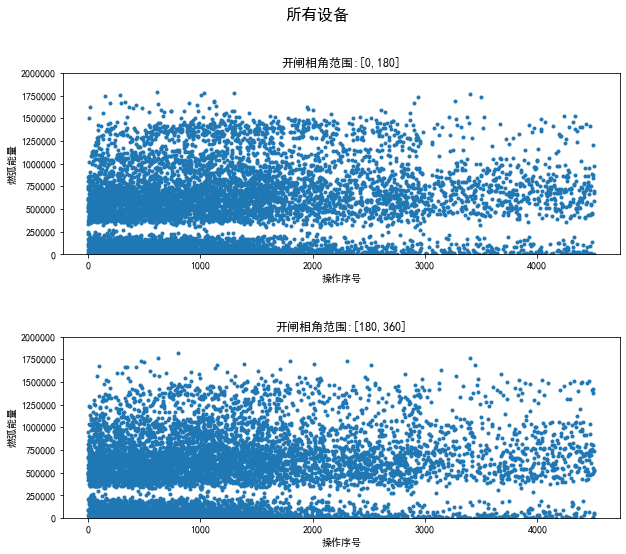

In [157]:
n_h_plots = 1
tot_ftr_df = pd.DataFrame()
for machine_id in range(1, 11):#
    ftr_df = pd.read_csv(ftr_path + str(machine_id) + '.csv')
    ftr_df['machine_id'] = machine_id
    ftr_df['operation_times'] = ftr_df.index
    tot_ftr_df = tot_ftr_df.append(ftr_df, ignore_index = True)
    
fig = plt.figure(figsize = (10,8))
fig.suptitle('所有设备',fontsize=16,y=1)
#plt.subplots_adjust(hspace=0.5,wspace=0.2)
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

y_max = max(tot_ftr_df['A_arcing_energy'])
for i in range(int(360 / angle_gap)):
    plt.subplot(int(360 / angle_gap / n_h_plots),n_h_plots,i + 1)
    plt.tight_layout(pad=5) 
    tmp_df = tot_ftr_df[(tot_ftr_df['A_phase_angle'] >= i * angle_gap) & (tot_ftr_df['A_phase_angle'] <= (i + 1) * angle_gap)]
    plt.plot(tmp_df['operation_times'], tmp_df['A_arcing_energy'],'.')
    plt.title('开闸相角范围:[' + str(i * angle_gap) +','+ str((i + 1) * angle_gap)+']')
    plt.xlabel('操作序号')
    plt.ylabel('燃弧能量')
    #plt.ylim([0,y_max + 2])
    plt.ylim([0,2000000])

fig.savefig(res_angle_path + 'x_angle_y_energy_tot_machine.png', dpi=100,bbox_inches ='tight')
    

(0, 2000000)

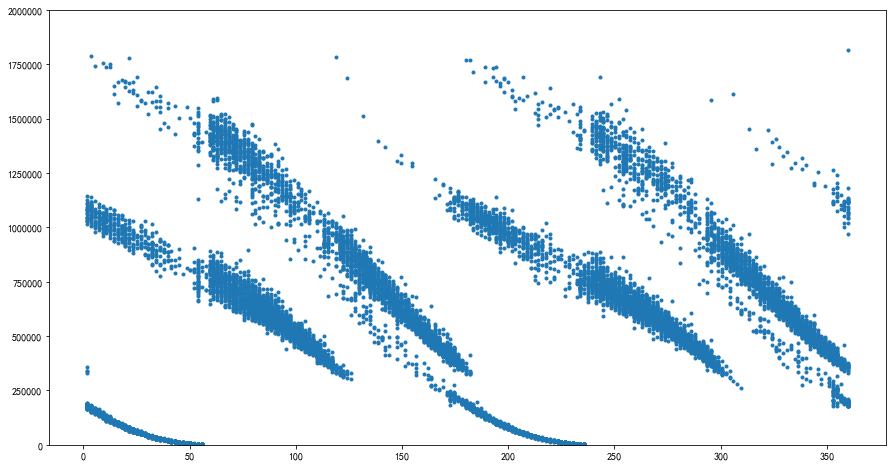

In [174]:
machine_ids = range(1, 11)#[1]
tot_ftr_df = pd.DataFrame()
for machine_id in machine_ids:#range(1, 11):#
    ftr_df = pd.read_csv(ftr_path + str(machine_id) + '.csv')
    ftr_df['machine_id'] = machine_id
    ftr_df['operation_times'] = ftr_df.index
    tot_ftr_df = tot_ftr_df.append(ftr_df, ignore_index = True)
plt.figure(figsize=(15, 8))
plt.plot(tot_ftr_df['A_phase_angle'], tot_ftr_df['A_arcing_energy'],'.')
plt.ylim([0,2000000])

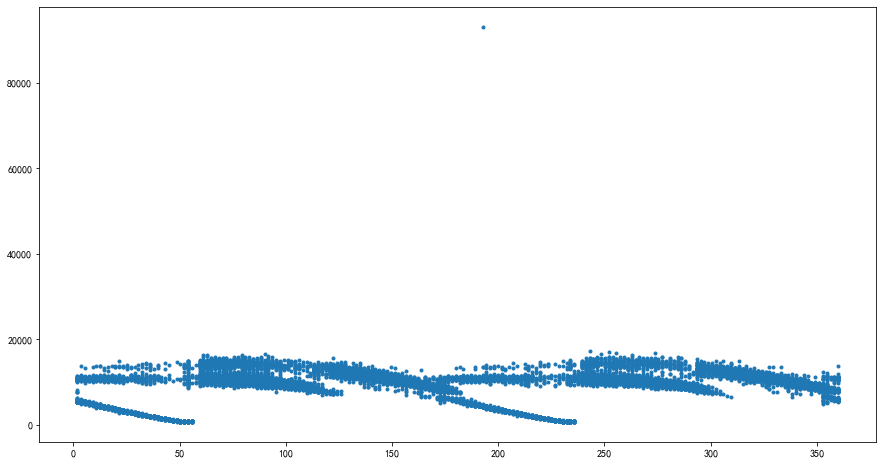

In [178]:

plt.figure(figsize=(15, 8))
plt.plot(tot_ftr_df['A_phase_angle'], tot_ftr_df['A_arcing_power'],'.')

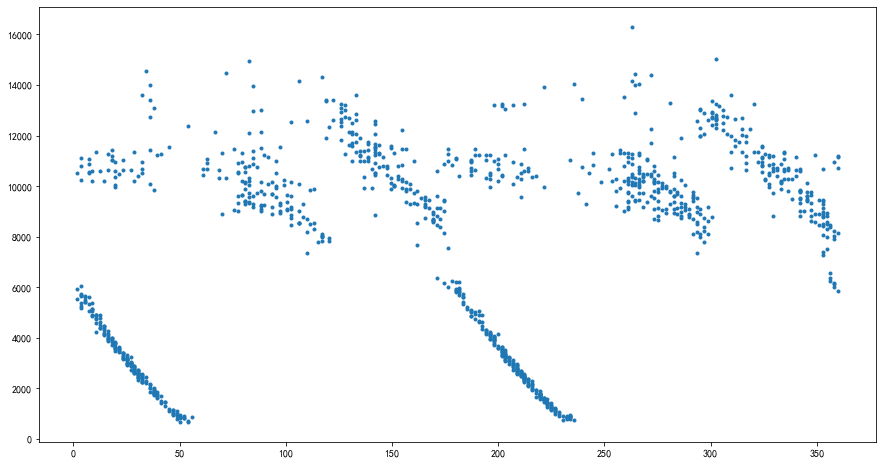

In [169]:

tot_ftr_df = pd.DataFrame()
for machine_id in machine_ids:#range(1, 11):#
    ftr_df = pd.read_csv(ftr_path + str(machine_id) + '.csv')
    ftr_df['machine_id'] = machine_id
    ftr_df['operation_times'] = ftr_df.index
    tot_ftr_df = tot_ftr_df.append(ftr_df, ignore_index = True)
plt.figure(figsize=(15, 8))
plt.plot(tot_ftr_df['A_phase_angle'], tot_ftr_df['A_arcing_power'],'.')
#plt.ylim([0,2000000])

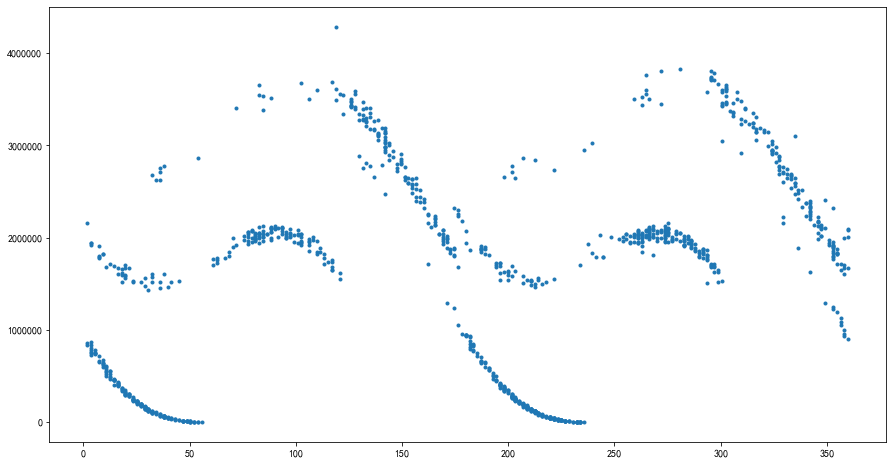

In [170]:

tot_ftr_df = pd.DataFrame()
for machine_id in machine_ids:#range(1, 11):#
    ftr_df = pd.read_csv(ftr_path + str(machine_id) + '.csv')
    ftr_df['machine_id'] = machine_id
    ftr_df['operation_times'] = ftr_df.index
    tot_ftr_df = tot_ftr_df.append(ftr_df, ignore_index = True)
plt.figure(figsize=(15, 8))
plt.plot(tot_ftr_df['A_phase_angle'], tot_ftr_df['A_arcing_electricity'],'.')
#plt.ylim([0,2000000])

In [181]:

import seaborn as sns

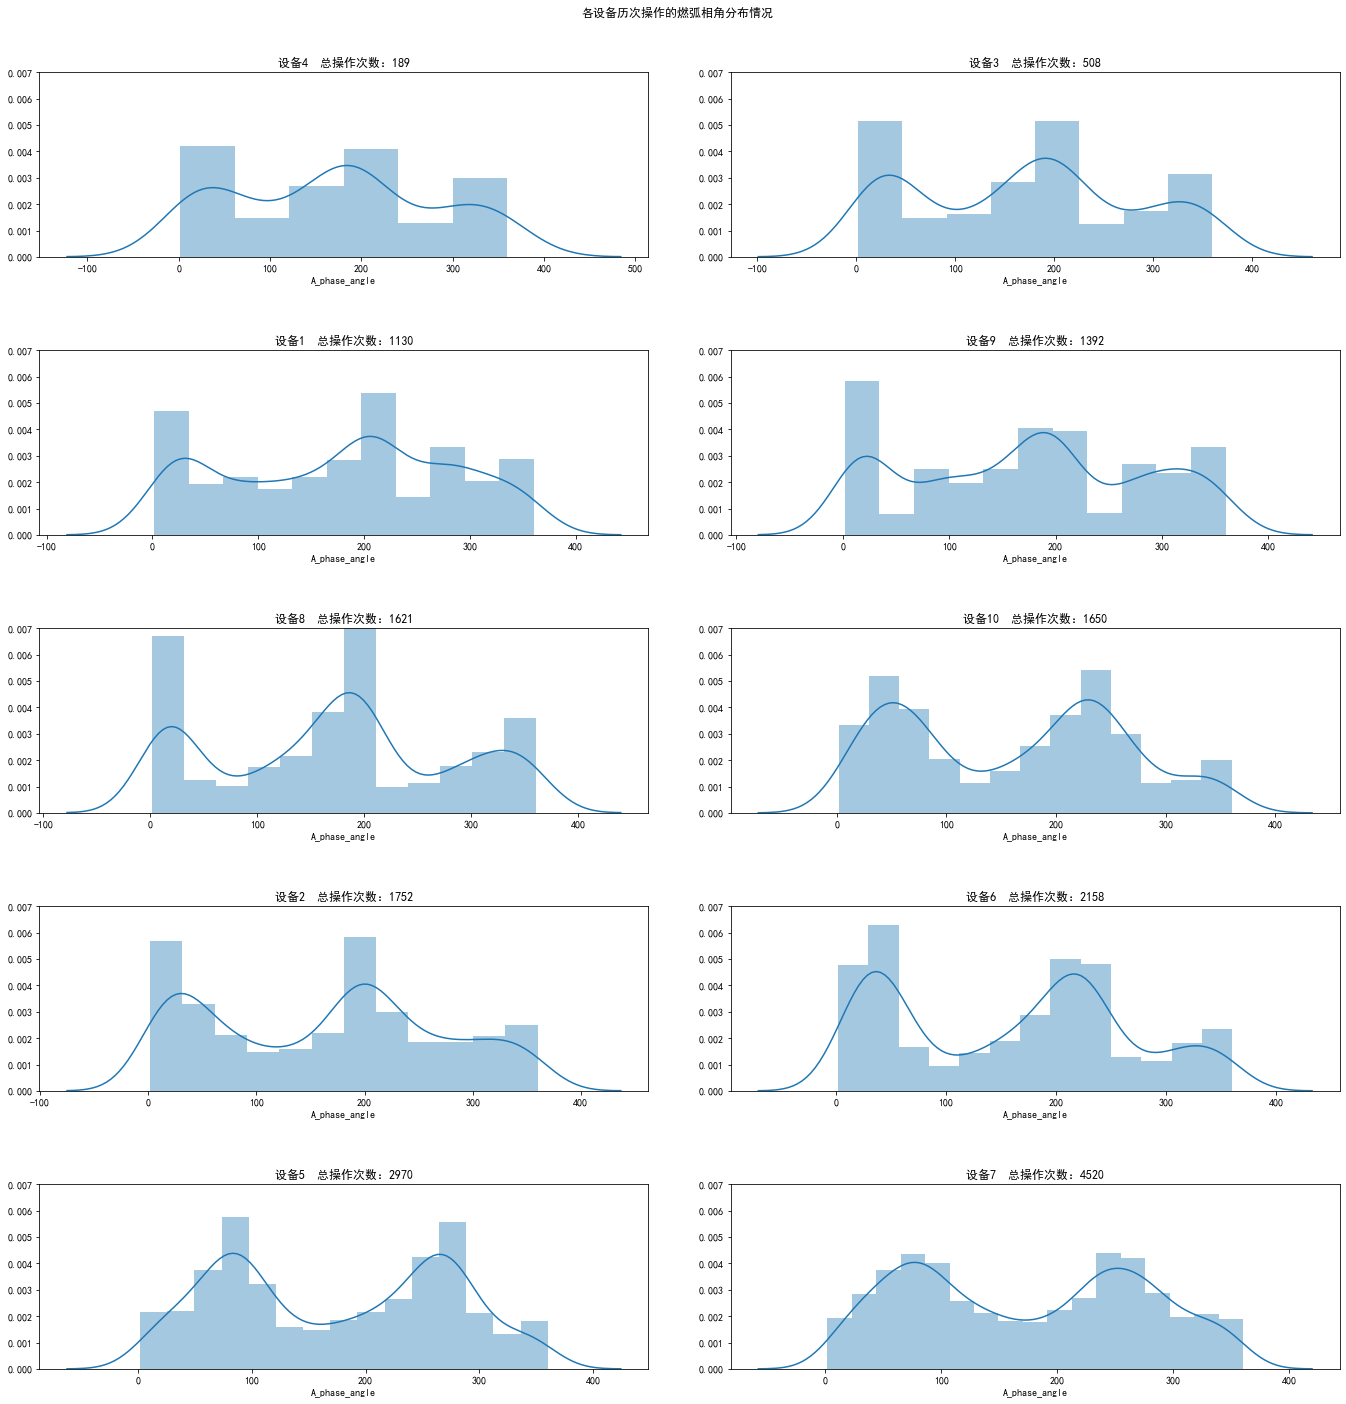

In [200]:
plt.figure(figsize=(20,20))
machine_ids = [4,3, 1, 9, 8, 10, 2, 6,5,7]
plt.suptitle('各设备历次操作的燃弧相角分布情况',  y = 1)
for i, machine_id in enumerate(machine_ids):#range(1, 11):#
    plt.subplot(5,2, i + 1)
    plt.tight_layout(pad=5) 
    ftr_df = pd.read_csv(ftr_path + str(machine_id) + '.csv')
    sns.distplot(ftr_df['A_phase_angle'])
    plt.title('设备' + str(machine_id) +'  总操作次数：' + str(len(ftr_df) + 9))
    plt.ylim([0,0.007])
plt.savefig('../res/分布/' + '各设备历次操作的燃弧相角分布情况.png', dpi=100,bbox_inches ='tight')

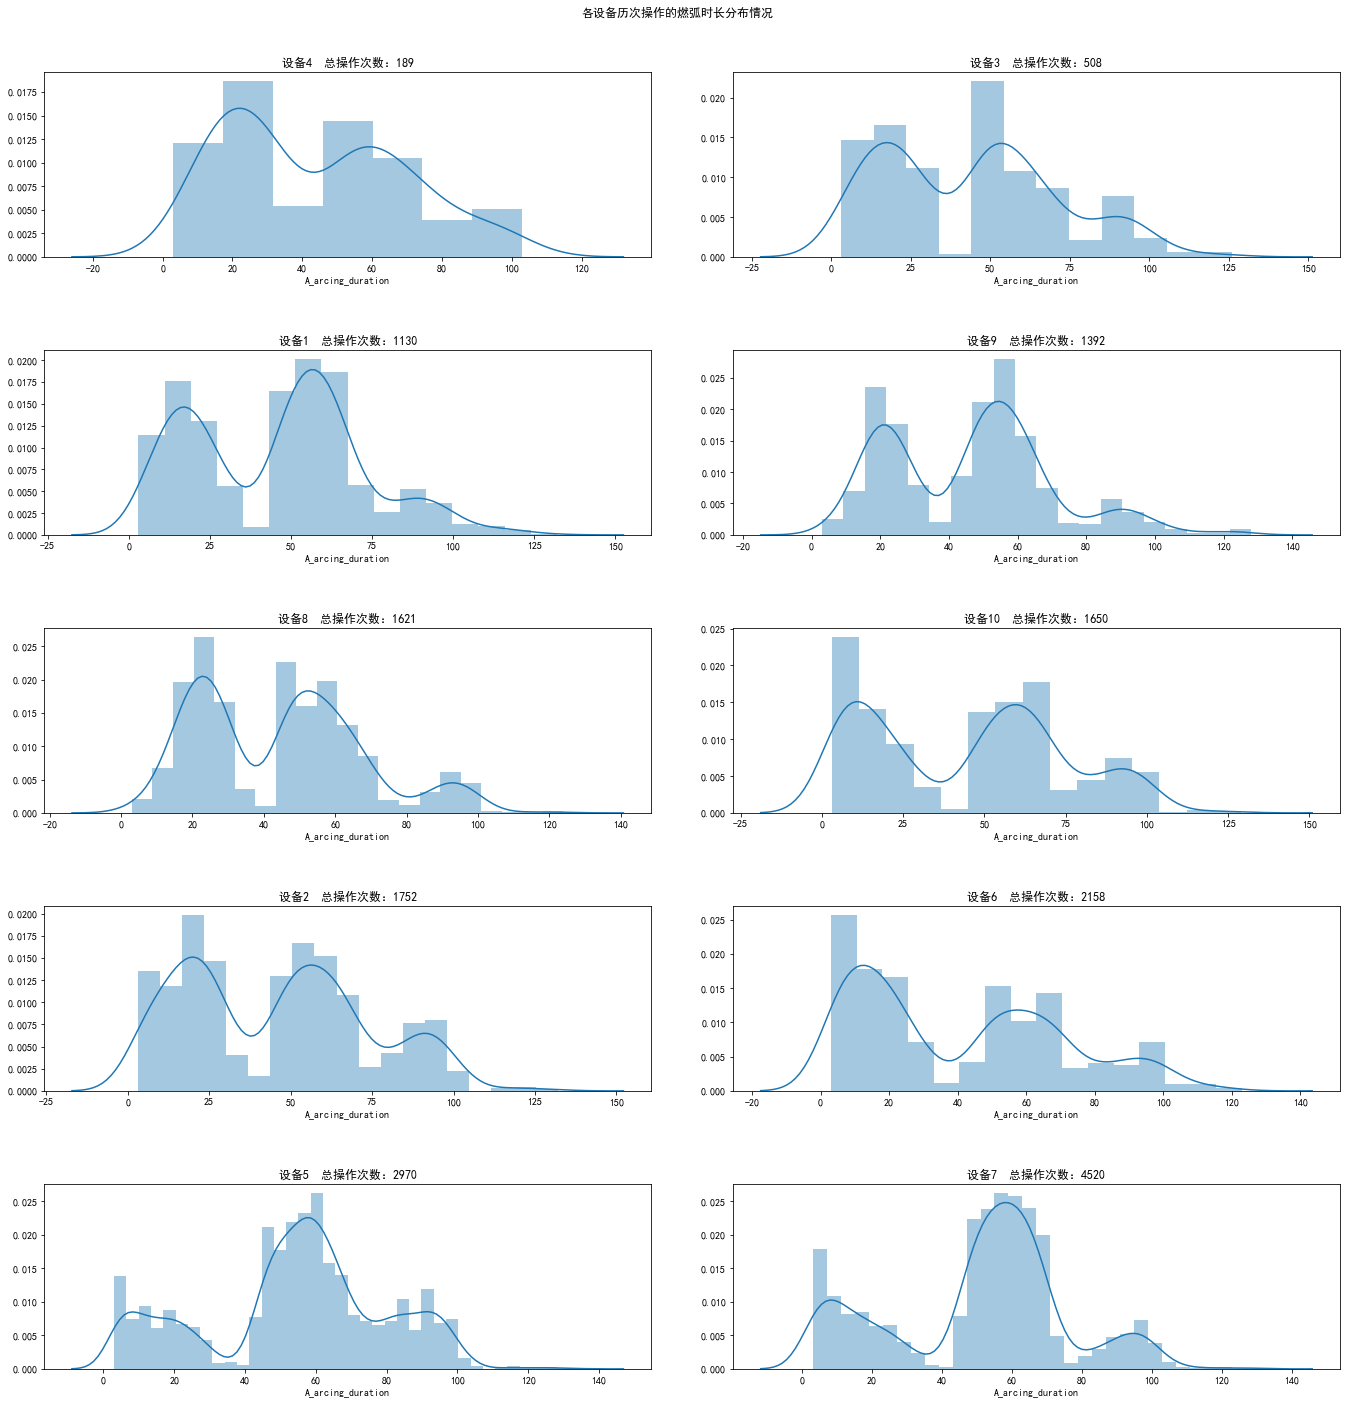

In [203]:
plt.figure(figsize=(20,20))
machine_ids = [4,3, 1, 9, 8, 10, 2, 6,5,7]
title = '各设备历次操作的燃弧时长分布情况'
plt.suptitle(title,  y = 1)
for i, machine_id in enumerate(machine_ids):#range(1, 11):#
    plt.subplot(5,2, i + 1)
    plt.tight_layout(pad=5) 
    ftr_df = pd.read_csv(ftr_path + str(machine_id) + '.csv')
    sns.distplot(ftr_df['A_arcing_duration'])
    plt.title('设备' + str(machine_id) +'  总操作次数：' + str(len(ftr_df) + 9))
plt.savefig('../res/分布/' + title+ '.png', dpi=100,bbox_inches ='tight')